# Exploratory Data Analysis on Somatic SNVs-FIREs

In [1]:
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker
sns.set_theme(font="Arial", font_scale=1.15, style='ticks') 
matplotlib.rcParams['figure.dpi'] = 150
plt.rc("axes.spines", top=True, right=True)

def perform_fisher_test(row):
    contingency_table = [
        [row['FIRE_COLO829'], row['COV_COLO829'] - row['FIRE_COLO829']],
        [row['FIRE_COLO829BL'], row['COV_COLO829BL'] - row['FIRE_COLO829BL']]
    ]
    oddsratio, p_value = stats.fisher_exact(contingency_table)
    return pd.Series([oddsratio, p_value])

In [2]:
"""
colotb = pd.read_table("CROSSTAB-FIRE_COLO829T_PassageB_DSA_on_FIRE_merged_COLO829BL_and_TB.tsv", sep='\t')
colobl = pd.read_table("CROSSTAB-FIRE_COLO829BL_DSA_on_FIRE_merged_COLO829BL_and_TB.tsv", sep='\t')

merged_df = pd.merge(colobl, colotb, on='ID', suffixes=('_COLO829BL', '_COLO829'))
print(merged_df.shape[0])

fireid_overlapped_w_snvs = set(map(lambda x: x.strip(), open("Intersect_FIRE_COLO829T_PassageB_SNVs_Shared_FIREid", 'r').readlines()))
"""

'\ncolotb = pd.read_table("CROSSTAB-FIRE_COLO829T_PassageB_DSA_on_FIRE_merged_COLO829BL_and_TB.tsv", sep=\'\t\')\ncolobl = pd.read_table("CROSSTAB-FIRE_COLO829BL_DSA_on_FIRE_merged_COLO829BL_and_TB.tsv", sep=\'\t\')\n\nmerged_df = pd.merge(colobl, colotb, on=\'ID\', suffixes=(\'_COLO829BL\', \'_COLO829\'))\nprint(merged_df.shape[0])\n\nfireid_overlapped_w_snvs = set(map(lambda x: x.strip(), open("Intersect_FIRE_COLO829T_PassageB_SNVs_Shared_FIREid", \'r\').readlines()))\n'

In [3]:
"""
merged_df_testset = merged_df[(merged_df['COV_COLO829BL'] >= 5) & (merged_df['COV_COLO829'] >= 5)]
merged_df_testset
"""

"\nmerged_df_testset = merged_df[(merged_df['COV_COLO829BL'] >= 5) & (merged_df['COV_COLO829'] >= 5)]\nmerged_df_testset\n"

In [4]:
"""
tqdm.pandas()
merged_df_testset[['oddsratio', 'pvalue']] = merged_df_testset.progress_apply(perform_fisher_test, axis=1)

rejected, fdr_pvalues, _, _ = multipletests(merged_df_testset['pvalue'], method='fdr_bh')
merged_df_testset['fdr_pvalue'] = fdr_pvalues
merged_df_testset['-log10(fdr_pvalue)'] = -np.log10(merged_df_testset['fdr_pvalue'])
merged_df_testset.sort_values(by='fdr_pvalue', ascending=True).head(n=30)
"""

"\ntqdm.pandas()\nmerged_df_testset[['oddsratio', 'pvalue']] = merged_df_testset.progress_apply(perform_fisher_test, axis=1)\n\nrejected, fdr_pvalues, _, _ = multipletests(merged_df_testset['pvalue'], method='fdr_bh')\nmerged_df_testset['fdr_pvalue'] = fdr_pvalues\nmerged_df_testset['-log10(fdr_pvalue)'] = -np.log10(merged_df_testset['fdr_pvalue'])\nmerged_df_testset.sort_values(by='fdr_pvalue', ascending=True).head(n=30)\n"

In [5]:
"""
merged_df_testset['Chromatin-Actuation_COLO829BL'] = merged_df_testset['FIRE_COLO829BL'] *100 / merged_df_testset['COV_COLO829BL']
merged_df_testset['Chromatin-Actuation_COLO829'] = merged_df_testset['FIRE_COLO829'] *100 / merged_df_testset['COV_COLO829']
merged_df_testset['ΔActuation'] = merged_df_testset['Chromatin-Actuation_COLO829'] - merged_df_testset['Chromatin-Actuation_COLO829BL']
merged_df_testset
"""

"\nmerged_df_testset['Chromatin-Actuation_COLO829BL'] = merged_df_testset['FIRE_COLO829BL'] *100 / merged_df_testset['COV_COLO829BL']\nmerged_df_testset['Chromatin-Actuation_COLO829'] = merged_df_testset['FIRE_COLO829'] *100 / merged_df_testset['COV_COLO829']\nmerged_df_testset['ΔActuation'] = merged_df_testset['Chromatin-Actuation_COLO829'] - merged_df_testset['Chromatin-Actuation_COLO829BL']\nmerged_df_testset\n"

In [6]:
"""
merged_df_testset_snvoverlap = merged_df_testset[merged_df_testset['ID'].isin(fireid_overlapped_w_snvs)]
merged_df_testset_snvoverlap
merged_df_testset['SNV_overlap'] = merged_df_testset['ID'].isin(fireid_overlapped_w_snvs)
"""

"\nmerged_df_testset_snvoverlap = merged_df_testset[merged_df_testset['ID'].isin(fireid_overlapped_w_snvs)]\nmerged_df_testset_snvoverlap\nmerged_df_testset['SNV_overlap'] = merged_df_testset['ID'].isin(fireid_overlapped_w_snvs)\n"

In [7]:
#fig, ax = plt.subplots(1,1, figsize=(5,5), constrained_layout=True)
#sns.scatterplot(data=merged_df_testset_snvoverlap, x="ΔActuation", y="-log10(fdr_pvalue)", hue='COV_COLO829', s=10, edgecolor='black', linewidth=0.3, ax=ax)
#ax.set_xlim(-80, 80)
#ax.set_ylabel("-Log10(FDR P Value)")
#ax.set_xlabel("ΔPercent actuation (Tumor - Normal)")
#ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

#fig, ax = plt.subplots(1,1, figsize=(5,5), constrained_layout=True)
#sns.scatterplot(data=merged_df_testset, x="ΔActuation", y="-log10(fdr_pvalue)", s=1, alpha=0.2, ax=ax)
#ax.set_xlim(-100, 100)
#ax.set_ylabel("-Log10(FDR P Value)")
#ax.set_xlabel("ΔPercent actuation (Tumor - Normal)")
#ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

In [8]:
"""
fig, ax = plt.subplots(1,1, figsize=(7.5,6.5), constrained_layout=True)
hb = ax.hexbin(merged_df_testset['ΔActuation'], merged_df_testset['-log10(fdr_pvalue)'], cmap='rainbow', gridsize=(150,150), bins='log')
ax.set(xlim=(-100, 100))
ax.set_ylabel("-Log10(FDR P Value)")
ax.set_xlabel("ΔPercent actuation (Tumor - Normal)")
ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
cb = fig.colorbar(hb, ax=ax)
cb.set_label(label='Counts', rotation=270, labelpad=10)

for i, row in merged_df_testset.iterrows():
    if row['SNV_overlap']:
        ax.plot(row['ΔActuation'], row['-log10(fdr_pvalue)'], '+', markersize=5, markeredgewidth=0.5, color='darkred')
"""

'\nfig, ax = plt.subplots(1,1, figsize=(7.5,6.5), constrained_layout=True)\nhb = ax.hexbin(merged_df_testset[\'ΔActuation\'], merged_df_testset[\'-log10(fdr_pvalue)\'], cmap=\'rainbow\', gridsize=(150,150), bins=\'log\')\nax.set(xlim=(-100, 100))\nax.set_ylabel("-Log10(FDR P Value)")\nax.set_xlabel("ΔPercent actuation (Tumor - Normal)")\nax.grid(True, which=\'both\', axis=\'both\', linestyle=\'--\', linewidth=0.5)\ncb = fig.colorbar(hb, ax=ax)\ncb.set_label(label=\'Counts\', rotation=270, labelpad=10)\n\nfor i, row in merged_df_testset.iterrows():\n    if row[\'SNV_overlap\']:\n        ax.plot(row[\'ΔActuation\'], row[\'-log10(fdr_pvalue)\'], \'+\', markersize=5, markeredgewidth=0.5, color=\'darkred\')\n'

In [9]:
"""
fig, ax = plt.subplots(1,2, figsize=(10,4), constrained_layout=True)
hb1 = ax[0].hexbin(merged_df_testset['-log10(fdr_pvalue)'], np.log10(merged_df_testset['COV_COLO829BL']), cmap='rainbow', gridsize=(150,150), bins='log')
ax[0].set(xlim=(-10, 150), ylim=(0.5, 4.5))
ax[0].set_xlabel("-Log10(FDR P Value)")
ax[0].set_ylabel("Log10(COLO829BL Coverage)")
ax[0].grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
cb1 = fig.colorbar(hb1, ax=ax[0])
cb1.set_label(label='Counts', rotation=270, labelpad=10)
hb2 = ax[1].hexbin(merged_df_testset['-log10(fdr_pvalue)'], np.log10(merged_df_testset['COV_COLO829']), cmap='rainbow', gridsize=(150,150), bins='log')
ax[1].set(xlim=(-10, 150), ylim=(0.5, 4.5))
ax[1].set_xlabel("-Log10(FDR P Value)")
ax[1].set_ylabel("Log10(COLO829 Coverage)")
ax[1].grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
cb2 = fig.colorbar(hb2, ax=ax[1])
cb2.set_label(label='Counts', rotation=270, labelpad=10)
"""

'\nfig, ax = plt.subplots(1,2, figsize=(10,4), constrained_layout=True)\nhb1 = ax[0].hexbin(merged_df_testset[\'-log10(fdr_pvalue)\'], np.log10(merged_df_testset[\'COV_COLO829BL\']), cmap=\'rainbow\', gridsize=(150,150), bins=\'log\')\nax[0].set(xlim=(-10, 150), ylim=(0.5, 4.5))\nax[0].set_xlabel("-Log10(FDR P Value)")\nax[0].set_ylabel("Log10(COLO829BL Coverage)")\nax[0].grid(True, which=\'both\', axis=\'both\', linestyle=\'--\', linewidth=0.5)\ncb1 = fig.colorbar(hb1, ax=ax[0])\ncb1.set_label(label=\'Counts\', rotation=270, labelpad=10)\nhb2 = ax[1].hexbin(merged_df_testset[\'-log10(fdr_pvalue)\'], np.log10(merged_df_testset[\'COV_COLO829\']), cmap=\'rainbow\', gridsize=(150,150), bins=\'log\')\nax[1].set(xlim=(-10, 150), ylim=(0.5, 4.5))\nax[1].set_xlabel("-Log10(FDR P Value)")\nax[1].set_ylabel("Log10(COLO829 Coverage)")\nax[1].grid(True, which=\'both\', axis=\'both\', linestyle=\'--\', linewidth=0.5)\ncb2 = fig.colorbar(hb2, ax=ax[1])\ncb2.set_label(label=\'Counts\', rotation=270,

## With Additional Filtering (Coverage lower bound)

In [10]:
"""
merged_df_testset2 = merged_df[(merged_df['COV_COLO829BL'] >= 10) & (merged_df['COV_COLO829'] >= 10)]

tqdm.pandas()
merged_df_testset2[['oddsratio', 'pvalue']] = merged_df_testset2.progress_apply(perform_fisher_test, axis=1)

rejected, fdr_pvalues, _, _ = multipletests(merged_df_testset2['pvalue'], method='fdr_bh')
merged_df_testset2['fdr_pvalue'] = fdr_pvalues
merged_df_testset2['-log10(fdr_pvalue)'] = -np.log10(merged_df_testset2['fdr_pvalue'])

merged_df_testset2['Chromatin-Actuation_COLO829BL'] = merged_df_testset2['FIRE_COLO829BL'] *100 / merged_df_testset2['COV_COLO829BL']
merged_df_testset2['Chromatin-Actuation_COLO829'] = merged_df_testset2['FIRE_COLO829'] *100 / merged_df_testset2['COV_COLO829']
merged_df_testset2['ΔActuation'] = merged_df_testset2['Chromatin-Actuation_COLO829'] - merged_df_testset2['Chromatin-Actuation_COLO829BL']
merged_df_testset2['SNV_overlap'] = merged_df_testset2['ID'].isin(fireid_overlapped_w_snvs)

fig, ax = plt.subplots(1,1, figsize=(7.5,6.5), constrained_layout=True)
hb = ax.hexbin(merged_df_testset2['ΔActuation'], merged_df_testset2['-log10(fdr_pvalue)'], cmap='rainbow', gridsize=(150,150), bins='log')
ax.set(xlim=(-100, 100))
ax.set_ylabel("-Log10(FDR P Value)")
ax.set_xlabel("ΔPercent actuation (Tumor - Normal)")
ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
cb = fig.colorbar(hb, ax=ax)
cb.set_label(label='Counts', rotation=270, labelpad=10)

for i, row in merged_df_testset2.iterrows():
    if row['SNV_overlap']:
        ax.plot(row['ΔActuation'], row['-log10(fdr_pvalue)'], '+', markersize=5, markeredgewidth=0.5, color='darkred')
"""

'\nmerged_df_testset2 = merged_df[(merged_df[\'COV_COLO829BL\'] >= 10) & (merged_df[\'COV_COLO829\'] >= 10)]\n\ntqdm.pandas()\nmerged_df_testset2[[\'oddsratio\', \'pvalue\']] = merged_df_testset2.progress_apply(perform_fisher_test, axis=1)\n\nrejected, fdr_pvalues, _, _ = multipletests(merged_df_testset2[\'pvalue\'], method=\'fdr_bh\')\nmerged_df_testset2[\'fdr_pvalue\'] = fdr_pvalues\nmerged_df_testset2[\'-log10(fdr_pvalue)\'] = -np.log10(merged_df_testset2[\'fdr_pvalue\'])\n\nmerged_df_testset2[\'Chromatin-Actuation_COLO829BL\'] = merged_df_testset2[\'FIRE_COLO829BL\'] *100 / merged_df_testset2[\'COV_COLO829BL\']\nmerged_df_testset2[\'Chromatin-Actuation_COLO829\'] = merged_df_testset2[\'FIRE_COLO829\'] *100 / merged_df_testset2[\'COV_COLO829\']\nmerged_df_testset2[\'ΔActuation\'] = merged_df_testset2[\'Chromatin-Actuation_COLO829\'] - merged_df_testset2[\'Chromatin-Actuation_COLO829BL\']\nmerged_df_testset2[\'SNV_overlap\'] = merged_df_testset2[\'ID\'].isin(fireid_overlapped_w_snvs)

## With Additional Filtering (Coverage Upper & Lower Bound)

In [11]:
"""merged_df_testset3 = merged_df[(merged_df['COV_COLO829BL'] >= 10) & (merged_df['COV_COLO829BL'] <= 300) & (merged_df['COV_COLO829'] >= 10)]

tqdm.pandas()
merged_df_testset3[['oddsratio', 'pvalue']] = merged_df_testset3.progress_apply(perform_fisher_test, axis=1)

rejected, fdr_pvalues, _, _ = multipletests(merged_df_testset3['pvalue'], method='fdr_bh')
merged_df_testset3['fdr_pvalue'] = fdr_pvalues
merged_df_testset3['-log10(fdr_pvalue)'] = -np.log10(merged_df_testset3['fdr_pvalue'])

merged_df_testset3['Chromatin-Actuation_COLO829BL'] = merged_df_testset3['FIRE_COLO829BL'] *100 / merged_df_testset3['COV_COLO829BL']
merged_df_testset3['Chromatin-Actuation_COLO829'] = merged_df_testset3['FIRE_COLO829'] *100 / merged_df_testset3['COV_COLO829']
merged_df_testset3['ΔActuation'] = merged_df_testset3['Chromatin-Actuation_COLO829'] - merged_df_testset3['Chromatin-Actuation_COLO829BL']
merged_df_testset3['SNV_overlap'] = merged_df_testset3['ID'].isin(fireid_overlapped_w_snvs)
"""

"merged_df_testset3 = merged_df[(merged_df['COV_COLO829BL'] >= 10) & (merged_df['COV_COLO829BL'] <= 300) & (merged_df['COV_COLO829'] >= 10)]\n\ntqdm.pandas()\nmerged_df_testset3[['oddsratio', 'pvalue']] = merged_df_testset3.progress_apply(perform_fisher_test, axis=1)\n\nrejected, fdr_pvalues, _, _ = multipletests(merged_df_testset3['pvalue'], method='fdr_bh')\nmerged_df_testset3['fdr_pvalue'] = fdr_pvalues\nmerged_df_testset3['-log10(fdr_pvalue)'] = -np.log10(merged_df_testset3['fdr_pvalue'])\n\nmerged_df_testset3['Chromatin-Actuation_COLO829BL'] = merged_df_testset3['FIRE_COLO829BL'] *100 / merged_df_testset3['COV_COLO829BL']\nmerged_df_testset3['Chromatin-Actuation_COLO829'] = merged_df_testset3['FIRE_COLO829'] *100 / merged_df_testset3['COV_COLO829']\nmerged_df_testset3['ΔActuation'] = merged_df_testset3['Chromatin-Actuation_COLO829'] - merged_df_testset3['Chromatin-Actuation_COLO829BL']\nmerged_df_testset3['SNV_overlap'] = merged_df_testset3['ID'].isin(fireid_overlapped_w_snvs)\n"

In [12]:
"""
fig, ax = plt.subplots(1,1, figsize=(7.5,6.5), constrained_layout=True)
hb = ax.hexbin(merged_df_testset3['ΔActuation'], merged_df_testset3['-log10(fdr_pvalue)'], cmap='rainbow', gridsize=(150,150), bins='log')
ax.set(xlim=(-100, 100))
ax.set_ylabel("-Log10(FDR P Value)")
ax.set_xlabel("Δ Percent actuation (Tumor - Normal)")
ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
cb = fig.colorbar(hb, ax=ax)
cb.set_label(label='Counts', rotation=270, labelpad=10)

for i, row in merged_df_testset3.iterrows():
    if row['SNV_overlap']:
        ax.plot(row['ΔActuation'], row['-log10(fdr_pvalue)'], '+', markersize=5, markeredgewidth=1, color='darkred')
"""

'\nfig, ax = plt.subplots(1,1, figsize=(7.5,6.5), constrained_layout=True)\nhb = ax.hexbin(merged_df_testset3[\'ΔActuation\'], merged_df_testset3[\'-log10(fdr_pvalue)\'], cmap=\'rainbow\', gridsize=(150,150), bins=\'log\')\nax.set(xlim=(-100, 100))\nax.set_ylabel("-Log10(FDR P Value)")\nax.set_xlabel("Δ Percent actuation (Tumor - Normal)")\nax.grid(True, which=\'both\', axis=\'both\', linestyle=\'--\', linewidth=0.5)\ncb = fig.colorbar(hb, ax=ax)\ncb.set_label(label=\'Counts\', rotation=270, labelpad=10)\n\nfor i, row in merged_df_testset3.iterrows():\n    if row[\'SNV_overlap\']:\n        ax.plot(row[\'ΔActuation\'], row[\'-log10(fdr_pvalue)\'], \'+\', markersize=5, markeredgewidth=1, color=\'darkred\')\n'

In [13]:
"""
print(f"{merged_df_testset3[(merged_df_testset3['SNV_overlap'] == True) & (merged_df_testset3['fdr_pvalue'] < 5e-2)].shape[0]}")
print(f"{merged_df_testset3[(merged_df_testset3['SNV_overlap'] == True) & (merged_df_testset3['ΔActuation'] < 0) & (merged_df_testset3['fdr_pvalue'] < 5e-2)].shape[0]}")
print(f"{merged_df_testset3[(merged_df_testset3['SNV_overlap'] == True) & (merged_df_testset3['ΔActuation'] > 0) & (merged_df_testset3['fdr_pvalue'] < 5e-2)].shape[0]}")
merged_df_testset3['SNV_overlap'].value_counts()
"""

'\nprint(f"{merged_df_testset3[(merged_df_testset3[\'SNV_overlap\'] == True) & (merged_df_testset3[\'fdr_pvalue\'] < 5e-2)].shape[0]}")\nprint(f"{merged_df_testset3[(merged_df_testset3[\'SNV_overlap\'] == True) & (merged_df_testset3[\'ΔActuation\'] < 0) & (merged_df_testset3[\'fdr_pvalue\'] < 5e-2)].shape[0]}")\nprint(f"{merged_df_testset3[(merged_df_testset3[\'SNV_overlap\'] == True) & (merged_df_testset3[\'ΔActuation\'] > 0) & (merged_df_testset3[\'fdr_pvalue\'] < 5e-2)].shape[0]}")\nmerged_df_testset3[\'SNV_overlap\'].value_counts()\n'

# Filter with Flagger (only Hap)

In [15]:
dir1="/mmfs1/gscratch/stergachislab/mhsohny/SMaHT/Improving_SomaticVariantCalling_through_DSA/Fiber-seq/VariantCalls_DeepVariant_1.6.1/FIREs/01.DSA"
colotb = pd.read_table(f"{dir1}/CROSSTAB-FIRE_COLO829T_PassageB_DSA_on_FIRE_merged_COLO829BL_and_TB.FlaggerHap.tsv", sep='\t')
colobl = pd.read_table(f"{dir1}/CROSSTAB-FIRE_COLO829BL_DSA_on_FIRE_merged_COLO829BL_and_TB.FlaggerHap.tsv", sep='\t')

merged_df = pd.merge(colobl[['ID', 'FIRE', 'COV']], colotb[['ID', 'FIRE', 'COV']], on='ID', suffixes=('_COLO829BL', '_COLO829'))
print(merged_df.shape[0])

fireid_overlapped_w_snvs = set(map(lambda x: x.strip(), open(f"{dir1}/Intersect_FIRE-FlaggerHap_with_COLO829T_PassageB_SNVs_Shared_FIREid", 'r').readlines())) 

merged_df_testset = merged_df[(merged_df['COV_COLO829BL'] >= 10) & (merged_df['COV_COLO829BL'] <= 300) & (merged_df['COV_COLO829'] >= 10)]

tqdm.pandas()
merged_df_testset = merged_df_testset.reset_index(drop=True).copy()
merged_df_testset[['oddsratio', 'pvalue']] = merged_df_testset.progress_apply(perform_fisher_test, axis=1)

247371


100%|██████████| 214410/214410 [01:42<00:00, 2086.32it/s]


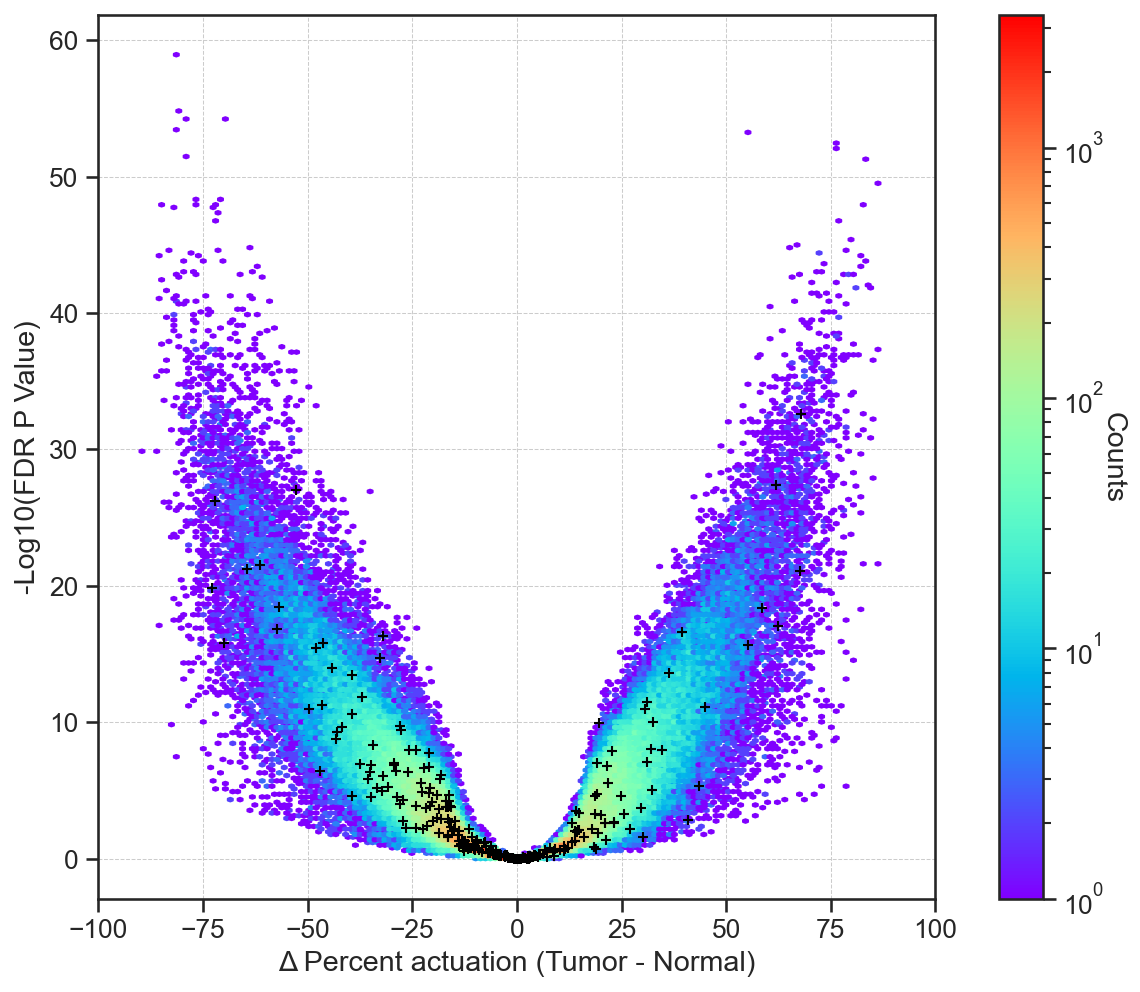

In [ ]:
rejected, fdr_pvalues, _, _ = multipletests(merged_df_testset['pvalue'], method='fdr_bh')
merged_df_testset = merged_df_testset.copy()

merged_df_testset['fdr_pvalue'] = fdr_pvalues
merged_df_testset['-log10(fdr_pvalue)'] = -np.log10(merged_df_testset['fdr_pvalue'])

merged_df_testset['Chromatin-Actuation_COLO829BL'] = merged_df_testset['FIRE_COLO829BL'] *100 / merged_df_testset['COV_COLO829BL']
merged_df_testset['Chromatin-Actuation_COLO829'] = merged_df_testset['FIRE_COLO829'] *100 / merged_df_testset['COV_COLO829']
merged_df_testset['ΔActuation'] = merged_df_testset['Chromatin-Actuation_COLO829'] - merged_df_testset['Chromatin-Actuation_COLO829BL']
merged_df_testset['SNV_overlap'] = merged_df_testset['ID'].isin(fireid_overlapped_w_snvs)

id_match = dict(zip(colobl['ID'], colobl['FIREid']))
merged_df_testset['FIREid'] = merged_df_testset['ID'].map(id_match)

fig, ax = plt.subplots(1,1, figsize=(7.5,6.5), constrained_layout=True)
hb = ax.hexbin(merged_df_testset['ΔActuation'], merged_df_testset['-log10(fdr_pvalue)'], cmap='rainbow', gridsize=(150,150), bins='log')
ax.set(xlim=(-100, 100))
ax.set_ylabel("-Log10(FDR P Value)")
ax.set_xlabel("Δ Percent actuation (Tumor - Normal)")
ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
cb = fig.colorbar(hb, ax=ax)
cb.set_label(label='Counts', rotation=270, labelpad=10)

for i, row in merged_df_testset.iterrows():
    if row['SNV_overlap']:
        ax.plot(row['ΔActuation'], row['-log10(fdr_pvalue)'], '+', markersize=5, markeredgewidth=1, color='black')

In [17]:
merged_df_testset

,ID,FIRE_COLO829BL,COV_COLO829BL,FIRE_COLO829,COV_COLO829,oddsratio,pvalue,fdr_pvalue,-log10(fdr_pvalue),Chromatin-Actuation_COLO829BL,Chromatin-Actuation_COLO829,ΔActuation,SNV_overlap,FIREid
0,haplotype1-0000001:15288-15424,37,155,18,59,1.400132,3.815856e-01,4.550578e-01,0.341933,23.870968,30.508475,6.637507,False,peak_1
1,haplotype1-0000001:15513-15688,121,156,47,60,1.045772,1.000000e+00,1.000000e+00,-0.000000,77.564103,78.333333,0.769231,False,peak_2
2,haplotype1-0000001:100858-101044,73,167,63,100,2.192521,2.468804e-03,4.762916e-03,2.322127,43.712575,63.000000,19.287425,False,peak_3
3,haplotype1-0000001:133568-133732,4,179,26,110,13.541667,9.919511e-09,5.181733e-08,7.285525,2.234637,23.636364,21.401727,False,peak_4
4,haplotype1-0000001:170904-171177,8,178,61,131,18.517857,3.372232e-19,9.621915e-18,17.016738,4.494382,46.564885,42.070503,False,peak_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214405,haplotype2-0000079:171766618-171766783,10,153,23,52,11.341379,3.762216e-09,2.125130e-08,7.672615,6.535948,44.230769,37.694822,False,peak_247351
214406,haplotype2-0000079:171794024-171794239,1,102,9,32,39.521739,8.022923e-06,2.420389e-05,4.616115,0.980392,28.125000,27.144608,False,peak_247352
214407,haplotype2-0000079:171796662-171797220,12,96,10,29,3.684211,1.118305e-02,1.915663e-02,1.717681,12.500000,34.482759,21.982759,False,peak_247353
214408,haplotype2-0000079:171801101-171801258,7,112,8,32,5.000000,5.363959e-03,9.745175e-03,2.011210,6.250000,25.000000,18.750000,False,peak_247354


In [ ]:
"""
print(f"{merged_df_testset[(merged_df_testset['fdr_pvalue'] < 5e-2) & (merged_df_testset['ΔActuation'] < 0)].shape[0]}")
print(f"{merged_df_testset[(merged_df_testset['fdr_pvalue'] < 5e-2) & (merged_df_testset['ΔActuation'] > 0)].shape[0]}")

print(f"{merged_df_testset[(merged_df_testset['SNV_overlap'] == True) & (merged_df_testset['fdr_pvalue'] < 5e-2)].shape[0]}")
print(f"{merged_df_testset[(merged_df_testset['SNV_overlap'] == True) & (merged_df_testset['ΔActuation'] < 0) & (merged_df_testset['fdr_pvalue'] < 5e-2)].shape[0]}")
print(f"{merged_df_testset[(merged_df_testset['SNV_overlap'] == True) & (merged_df_testset['ΔActuation'] > 0) & (merged_df_testset['fdr_pvalue'] < 5e-2)].shape[0]}")

114747
55262
176
130
46
"""

'\nprint(f"{merged_df_testset[(merged_df_testset[\'fdr_pvalue\'] < 5e-2) & (merged_df_testset[\'ΔActuation\'] < 0)].shape[0]}")\nprint(f"{merged_df_testset[(merged_df_testset[\'fdr_pvalue\'] < 5e-2) & (merged_df_testset[\'ΔActuation\'] > 0)].shape[0]}")\n\nprint(f"{merged_df_testset[(merged_df_testset[\'SNV_overlap\'] == True) & (merged_df_testset[\'fdr_pvalue\'] < 5e-2)].shape[0]}")\nprint(f"{merged_df_testset[(merged_df_testset[\'SNV_overlap\'] == True) & (merged_df_testset[\'ΔActuation\'] < 0) & (merged_df_testset[\'fdr_pvalue\'] < 5e-2)].shape[0]}")\nprint(f"{merged_df_testset[(merged_df_testset[\'SNV_overlap\'] == True) & (merged_df_testset[\'ΔActuation\'] > 0) & (merged_df_testset[\'fdr_pvalue\'] < 5e-2)].shape[0]}")\n\n114747\n55262\n176\n130\n46\n'

In [ ]:
print(f"Total number of FIREs tested: {merged_df_testset.shape[0]:,}")
print(f"The number of FIRE peaks with FDR-corrected p-value < 0.05: {merged_df_testset[(merged_df_testset['fdr_pvalue'] < 5e-2)].shape[0]:,} ({merged_df_testset[(merged_df_testset['fdr_pvalue'] < 5e-2)].shape[0]*100 / merged_df_testset.shape[0]:.2f}%)")
print('\n')
print(f"Of these, ")
print(f"The number of FIRE peaks with Percent actuation[Tumor < Normal]: {merged_df_testset[(merged_df_testset['fdr_pvalue'] < 5e-2) & (merged_df_testset['ΔActuation'] < 0)].shape[0]:,}")
print(f"The number of FIRE peaks with Percent actuation[Tumor > Normal]: {merged_df_testset[(merged_df_testset['fdr_pvalue'] < 5e-2) & (merged_df_testset['ΔActuation'] > 0)].shape[0]:,}")
print('\n')
print(f"Total number of FIRE peaks overlapped with somatic SNV: {merged_df_testset[(merged_df_testset['SNV_overlap'] == True)].shape[0]:,}")
print(f"The number of differential FIRE peaks overlapped with somatic SNV: {merged_df_testset[(merged_df_testset['SNV_overlap'] == True) & (merged_df_testset['fdr_pvalue'] < 5e-2)].shape[0]:,}")
print('\n')
print(f"Of these, ")
print(f"The number of FIRE peaks with Percent actuation[Tumor < Normal]: {merged_df_testset[(merged_df_testset['SNV_overlap'] == True) & (merged_df_testset['ΔActuation'] < 0) & (merged_df_testset['fdr_pvalue'] < 5e-2)].shape[0]:,}")
print(f"The number of FIRE peaks with Percent actuation[Tumor > Normal]: {merged_df_testset[(merged_df_testset['SNV_overlap'] == True) & (merged_df_testset['ΔActuation'] > 0) & (merged_df_testset['fdr_pvalue'] < 5e-2)].shape[0]:,}")

Total number of FIREs tested: 214,410
The number of FIRE peaks with FDR-corrected p-value < 0.05: 137,029 (63.91%)


Of these, 
The number of FIRE peaks with Percent actuation[Tumor < Normal]: 78,101
The number of FIRE peaks with Percent actuation[Tumor > Normal]: 58,928


Total number of FIRE peaks overlapped with somatic SNV: 250
The number of differential FIRE peaks overlapped with somatic SNV: 140


Of these, 
The number of FIRE peaks with Percent actuation[Tumor < Normal]: 92
The number of FIRE peaks with Percent actuation[Tumor > Normal]: 48


In [ ]:
merged_df_testset

,ID,FIRE_COLO829BL,COV_COLO829BL,FIRE_COLO829,COV_COLO829,oddsratio,pvalue,fdr_pvalue,-log10(fdr_pvalue),Chromatin-Actuation_COLO829BL,Chromatin-Actuation_COLO829,ΔActuation,SNV_overlap,FIREid
0,haplotype1-0000001:15288-15424,37,155,18,59,1.400132,3.815856e-01,4.550578e-01,0.341933,23.870968,30.508475,6.637507,False,peak_1
1,haplotype1-0000001:15513-15688,121,156,47,60,1.045772,1.000000e+00,1.000000e+00,-0.000000,77.564103,78.333333,0.769231,False,peak_2
2,haplotype1-0000001:100858-101044,73,167,63,100,2.192521,2.468804e-03,4.762916e-03,2.322127,43.712575,63.000000,19.287425,False,peak_3
3,haplotype1-0000001:133568-133732,4,179,26,110,13.541667,9.919511e-09,5.181733e-08,7.285525,2.234637,23.636364,21.401727,False,peak_4
4,haplotype1-0000001:170904-171177,8,178,61,131,18.517857,3.372232e-19,9.621915e-18,17.016738,4.494382,46.564885,42.070503,False,peak_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214405,haplotype2-0000079:171766618-171766783,10,153,23,52,11.341379,3.762216e-09,2.125130e-08,7.672615,6.535948,44.230769,37.694822,False,peak_247351
214406,haplotype2-0000079:171794024-171794239,1,102,9,32,39.521739,8.022923e-06,2.420389e-05,4.616115,0.980392,28.125000,27.144608,False,peak_247352
214407,haplotype2-0000079:171796662-171797220,12,96,10,29,3.684211,1.118305e-02,1.915663e-02,1.717681,12.500000,34.482759,21.982759,False,peak_247353
214408,haplotype2-0000079:171801101-171801258,7,112,8,32,5.000000,5.363959e-03,9.745175e-03,2.011210,6.250000,25.000000,18.750000,False,peak_247354


In [ ]:
merged_df_testset.to_csv("FIRE_contingency_table.tsv", sep='\t')

In [18]:
dinuc_fire = """haplotype1-0000001:28039676-28039876
haplotype1-0000001:71676688-71676845
haplotype1-0000002:3615099-3615439
haplotype1-0000006:10208544-10208747
haplotype1-0000006:53217503-53217695
haplotype1-0000006:57426928-57427069
haplotype1-0000009:149885083-149885236
haplotype1-0000010:1299286-1299417
haplotype1-0000010:178466-178666
haplotype1-0000011:107348023-107348156
haplotype1-0000011:149506863-149507001
haplotype1-0000012:224055164-224055516
haplotype1-0000013:38314838-38315060
haplotype1-0000018:106478-115614
haplotype1-0000024:16326987-16327180
haplotype1-0000024:93014655-93014835
haplotype1-0000026:29785891-29786043
haplotype1-0000027:154693509-154693614
haplotype1-0000028:18322118-18322257
haplotype2-0000048:65008990-65009159
haplotype2-0000049:13012996-13013235
haplotype2-0000050:9531868-9532016
haplotype2-0000053:2136423-2136579
haplotype2-0000053:58129460-58129575
haplotype2-0000053:7784175-7784316
haplotype2-0000055:4324854-4325034
haplotype2-0000059:77617410-77617562
haplotype2-0000066:10824437-10824708
haplotype2-0000071:4169202-4169883
haplotype2-0000079:29883421-29883554
haplotype2-0000079:30642485-30642956
haplotype2-0000079:7074759-7074914"""
# bedtools intersect -wao -a FIRE_merged_COLO829BL_and_TB.FlaggerHap.bed.gz -b COLO829T_PassageB_DSA.deepvariant.split.snv.modified.final.tba.vcf.gz | awk 'BEGIN { OFS = "" } {if ($4 != ".") print $1,":",$2,"-",$3}' | sort | uniq -cd
dinuc_fire=dinuc_fire.split()
print(len(dinuc_fire))

32


In [ ]:
merged_df_testset[merged_df_testset['ID'].isin(dinuc_fire)].shape

(10, 14)

In [ ]:
print('DBS in COLO829T that are missed by the filtering:')
c = 1
for id in dinuc_fire:
    if id not in merged_df_testset['ID'].values:
        print(f"{c}:{id}")
        c += 1

DBS in COLO829T that are missed by the filtering:
1:haplotype1-0000001:28039676-28039876
2:haplotype1-0000006:10208544-10208747
3:haplotype1-0000006:53217503-53217695
4:haplotype1-0000006:57426928-57427069
5:haplotype1-0000009:149885083-149885236
6:haplotype1-0000010:1299286-1299417
7:haplotype1-0000010:178466-178666
8:haplotype1-0000011:107348023-107348156
9:haplotype1-0000012:224055164-224055516
10:haplotype1-0000013:38314838-38315060
11:haplotype1-0000018:106478-115614
12:haplotype1-0000024:93014655-93014835
13:haplotype1-0000027:154693509-154693614
14:haplotype1-0000028:18322118-18322257
15:haplotype2-0000050:9531868-9532016
16:haplotype2-0000053:2136423-2136579
17:haplotype2-0000053:58129460-58129575
18:haplotype2-0000053:7784175-7784316
19:haplotype2-0000055:4324854-4325034
20:haplotype2-0000059:77617410-77617562
21:haplotype2-0000079:29883421-29883554
22:haplotype2-0000079:7074759-7074914


In [20]:
merged_df_testset[merged_df_testset['ID'].isin(dinuc_fire)]

,ID,FIRE_COLO829BL,COV_COLO829BL,FIRE_COLO829,COV_COLO829,oddsratio,pvalue,fdr_pvalue,-log10(fdr_pvalue),Chromatin-Actuation_COLO829BL,Chromatin-Actuation_COLO829,ΔActuation,SNV_overlap,FIREid
4105,haplotype1-0000001:71676688-71676845,111,174,69,110,0.955175,8.996425e-01,9.279315e-01,0.032484,63.793103,62.727273,-1.065831,True,peak_4110
4716,haplotype1-0000002:3615099-3615439,108,130,47,56,1.063786,1.000000e+00,1.000000e+00,-0.000000,83.076923,83.928571,0.851648,True,peak_4747
47822,haplotype1-0000011:149506863-149507001,31,146,11,64,0.769933,5.766770e-01,6.470798e-01,0.189042,21.232877,17.187500,-4.045377,True,peak_49842
105102,haplotype1-0000024:16326987-16327180,33,154,5,110,0.174603,6.943746e-05,1.762133e-04,3.753961,21.428571,4.545455,-16.883117,True,peak_107250
113172,haplotype1-0000026:29785891-29786043,35,137,4,82,0.149451,4.960030e-05,1.293111e-04,3.888364,25.547445,4.878049,-20.669396,True,peak_115322
130377,haplotype2-0000048:65008990-65009159,76,124,0,85,0.000000,4.941649e-24,2.977069e-22,21.526211,61.290323,0.000000,-61.290323,True,peak_132585
132255,haplotype2-0000049:13012996-13013235,102,130,63,75,1.441176,3.661040e-01,4.391065e-01,0.357430,78.461538,84.000000,5.538462,True,peak_134783
180813,haplotype2-0000066:10824437-10824708,115,134,40,50,0.660870,3.658320e-01,4.388314e-01,0.357702,85.820896,80.000000,-5.820896,True,peak_206760
183407,haplotype2-0000071:4169202-4169883,215,258,184,217,1.115152,7.072871e-01,7.670374e-01,0.115183,83.333333,84.792627,1.459293,True,peak_214215
208590,haplotype2-0000079:30642485-30642956,107,147,48,70,0.815633,5.244674e-01,5.971794e-01,0.223895,72.789116,68.571429,-4.217687,True,peak_241534


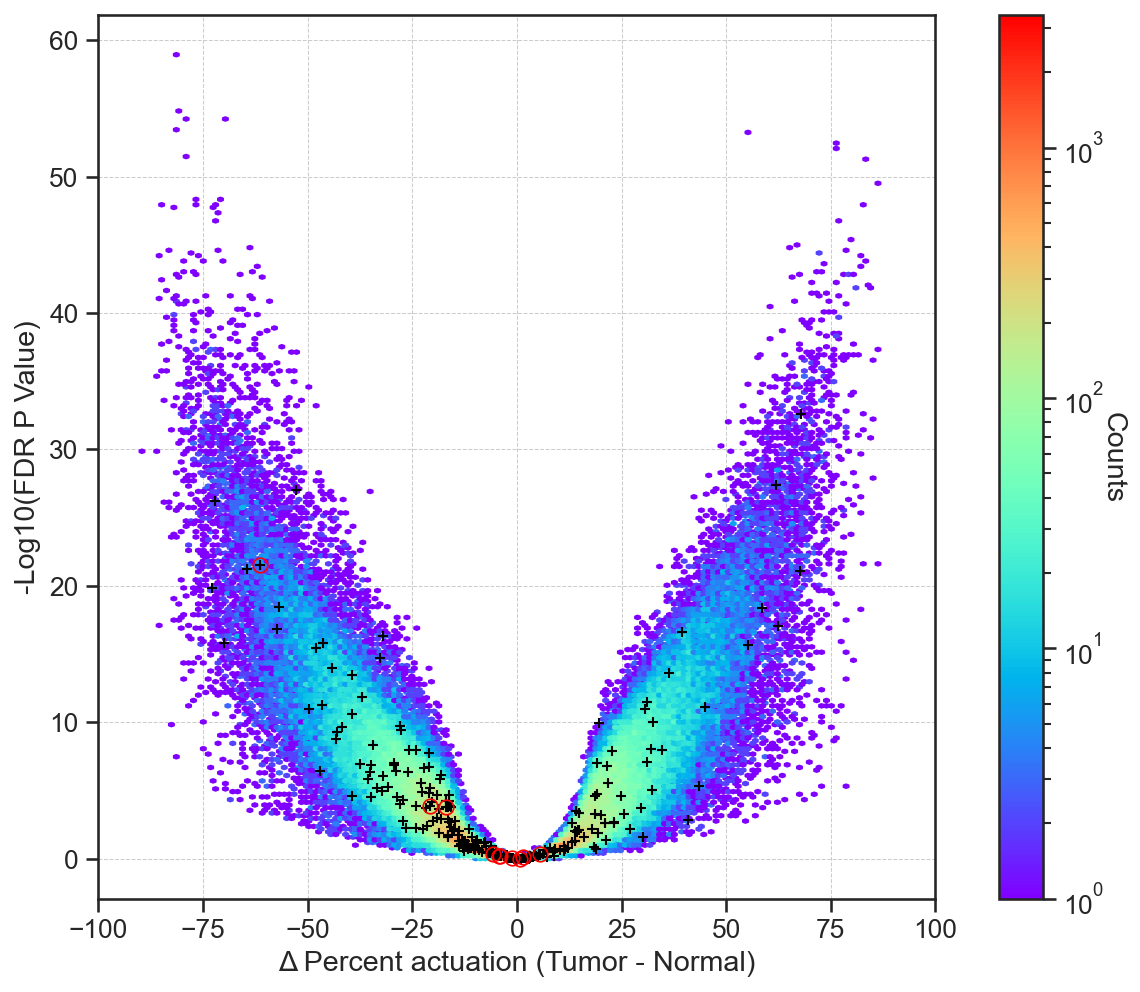

In [32]:
merged_df_testset['Dinuc_overlap'] = merged_df_testset['ID'].isin(dinuc_fire)

fig, ax = plt.subplots(1,1, figsize=(7.5,6.5), constrained_layout=True)
hb = ax.hexbin(merged_df_testset['ΔActuation'], merged_df_testset['-log10(fdr_pvalue)'], cmap='rainbow', gridsize=(150,150), bins='log')
ax.set(xlim=(-100, 100))
ax.set_ylabel("-Log10(FDR P Value)")
ax.set_xlabel("Δ Percent actuation (Tumor - Normal)")
ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
cb = fig.colorbar(hb, ax=ax)
cb.set_label(label='Counts', rotation=270, labelpad=10)

for i, row in merged_df_testset.iterrows():
    if row['SNV_overlap']:
        ax.plot(row['ΔActuation'], row['-log10(fdr_pvalue)'], '+', markersize=5, markeredgewidth=1, color='black')

for i, row in merged_df_testset.iterrows():
    if row['Dinuc_overlap']:
        ax.plot(row['ΔActuation'], row['-log10(fdr_pvalue)'], 'o', markersize=7, markeredgewidth=0.8, markerfacecolor='none', color='red')

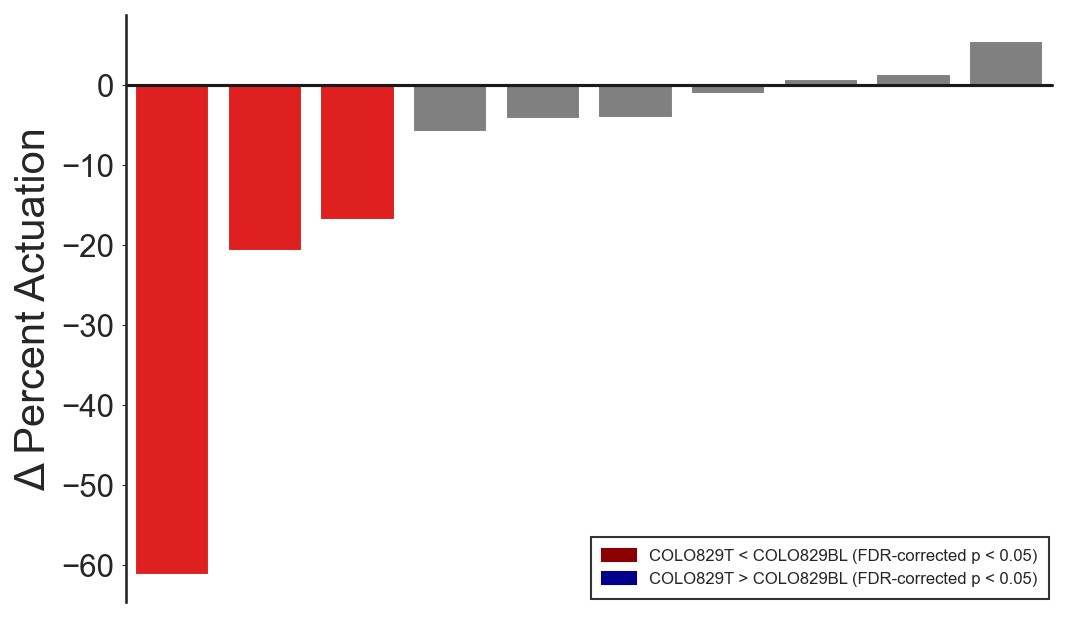

In [ ]:
dinuc_df = merged_df_testset[merged_df_testset['ID'].isin(dinuc_fire)].sort_values(by='ΔActuation').reset_index(drop=True).copy()

colors = ['red' if p < 0.05 else 'grey' for p in dinuc_df['fdr_pvalue']]

fig, ax = plt.subplots(1,1, figsize=(7,4), constrained_layout=True)
sns.barplot(dinuc_df,
            x="ID",
            y="ΔActuation",
            hue="ID",
            palette=colors,
            ax=ax) # unsetting the hue would give you warnings

ax.axhline(0, color="k", clip_on=False)
ax.set_xlabel('')
ax.tick_params(axis='x', bottom=False, labelbottom=False)
ax.set_ylabel('Δ Percent Actuation', fontsize=20)
ax.tick_params(axis='y', labelsize=15, length=2, width=.5)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

legend_labels = [
    matplotlib.patches.Patch(color='darkred', label='COLO829T < COLO829BL (FDR-corrected p < 0.05)'),
    matplotlib.patches.Patch(color='darkblue', label='COLO829T > COLO829BL (FDR-corrected p < 0.05)')
]
legend = ax.legend(handles=legend_labels, loc='lower right', fontsize=8)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1)
legend.get_frame().set_boxstyle('square')

In [19]:
sns.set_theme(font="Arial", font_scale=1.15, style='ticks') 
matplotlib.rcParams['figure.dpi'] = 700
plt.rc("axes.spines", top=True, right=True)

merged_df_testset_snvoverlap = merged_df_testset[merged_df_testset["SNV_overlap"]].sort_values(by='ΔActuation').reset_index(drop=True).copy()

colors = [
    'darkred' if p < 0.05 and delta < 0 else 
    'darkblue' if p < 0.05 and delta > 0 else 
    'grey' 
    for p, delta in zip(merged_df_testset_snvoverlap['fdr_pvalue'], merged_df_testset_snvoverlap['ΔActuation'])
]

fig, ax = plt.subplots(1, 1, figsize=(20, 10), constrained_layout=True)
sns.barplot(
    data=merged_df_testset_snvoverlap,
    x="ID",
    y="ΔActuation",
    hue="ID",
    dodge=False,
    palette=colors,
    ax=ax
)  # unsetting the hue would give you warnings

ax.axhline(0, color="k", clip_on=False)
ax.set_xlabel('')
ax.tick_params(axis='x', bottom=False, labelbottom=False)
ax.set_ylabel('Δ Percent Actuation', fontsize=20)
ax.tick_params(axis='y', labelsize=15, length=2, width=.5)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

legend_labels = [
    matplotlib.patches.Patch(color='darkred', label='COLO829T < COLO829BL (FDR-corrected p < 0.05)'),
    matplotlib.patches.Patch(color='darkblue', label='COLO829T > COLO829BL (FDR-corrected p < 0.05)')
]
legend = ax.legend(handles=legend_labels, loc='upper left', bbox_to_anchor=(0.01, 0.95), fontsize=15)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1)
legend.get_frame().set_boxstyle('square')


In [ ]:
len(set(merged_df_testset_snvoverlap['FIREid'].values))

250

In [ ]:
n_sig_wsnv = merged_df_testset[(merged_df_testset['fdr_pvalue'] < 0.05) & (merged_df_testset['SNV_overlap'])].shape[0]
n_sig_wosnv = merged_df_testset[(merged_df_testset['fdr_pvalue'] < 0.05) & (~merged_df_testset['SNV_overlap'])].shape[0]
n_notsig_wsnv = merged_df_testset[(merged_df_testset['fdr_pvalue'] >= 0.05) & (merged_df_testset['SNV_overlap'])].shape[0]
n_notsig_wosnv = merged_df_testset[(merged_df_testset['fdr_pvalue'] >= 0.05) & (~merged_df_testset['SNV_overlap'])].shape[0]

print(n_sig_wsnv, n_notsig_wsnv, n_sig_wsnv/n_notsig_wsnv)
print(n_sig_wosnv, n_notsig_wosnv, n_sig_wosnv/n_notsig_wosnv)

contingency_table = [
    [n_sig_wsnv, n_sig_wosnv],
    [n_notsig_wsnv, n_notsig_wosnv]
    ]
print(contingency_table)
oddsratio, p_value = stats.fisher_exact(contingency_table)

print(oddsratio, p_value)

140 110 1.2727272727272727
136889 77271 1.7715443051079964
[[140, 136889], [110, 77271]]
0.7184281358685438 0.010128565348565821


In [ ]:
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies: {expected}")

Chi-square statistic: 6.450242530568018
P-value: 0.011093719736032822
Degrees of freedom: 1
Expected frequencies: [[1.59774497e+02 1.36869226e+05]
 [9.02255025e+01 7.72907745e+04]]


## Reading in saved contingency table

In [ ]:
merged_df_testset = pd.read_table("FIRE_contingency_table.tsv", index_col=0)
merged_df_testset

,ID,FIRE_COLO829BL,COV_COLO829BL,FIRE_COLO829,COV_COLO829,oddsratio,pvalue,fdr_pvalue,-log10(fdr_pvalue),Chromatin-Actuation_COLO829BL,Chromatin-Actuation_COLO829,ΔActuation,SNV_overlap,FIREid
0,haplotype1-0000001:15288-15424,37,155,18,59,1.400132,3.815856e-01,4.550578e-01,0.341933,23.870968,30.508475,6.637507,False,peak_1
1,haplotype1-0000001:15513-15688,121,156,47,60,1.045772,1.000000e+00,1.000000e+00,-0.000000,77.564103,78.333333,0.769231,False,peak_2
2,haplotype1-0000001:100858-101044,73,167,63,100,2.192521,2.468804e-03,4.762916e-03,2.322127,43.712575,63.000000,19.287425,False,peak_3
3,haplotype1-0000001:133568-133732,4,179,26,110,13.541667,9.919511e-09,5.181733e-08,7.285525,2.234637,23.636364,21.401727,False,peak_4
4,haplotype1-0000001:170904-171177,8,178,61,131,18.517857,3.372232e-19,9.621915e-18,17.016738,4.494382,46.564885,42.070503,False,peak_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214405,haplotype2-0000079:171766618-171766783,10,153,23,52,11.341379,3.762216e-09,2.125130e-08,7.672615,6.535948,44.230769,37.694822,False,peak_247351
214406,haplotype2-0000079:171794024-171794239,1,102,9,32,39.521739,8.022923e-06,2.420389e-05,4.616115,0.980392,28.125000,27.144608,False,peak_247352
214407,haplotype2-0000079:171796662-171797220,12,96,10,29,3.684211,1.118305e-02,1.915663e-02,1.717681,12.500000,34.482759,21.982759,False,peak_247353
214408,haplotype2-0000079:171801101-171801258,7,112,8,32,5.000000,5.363959e-03,9.745175e-03,2.011210,6.250000,25.000000,18.750000,False,peak_247354


In [ ]:
firepeak_hg38 = pd.read_table("/mmfs1/gscratch/stergachislab/mhsohny/SMaHT/Improving_SomaticVariantCalling_through_DSA/Fiber-seq/VariantCalls_DeepVariant_1.6.1/FIREs/02.DSAtohg38/liftOver/FIRE_merged_COLO829BL_and_TB.FlaggerHap_tohg38_sorted.bed", sep='\t', header=None)
firepeak_hg38.columns = ['chrom', 'start', 'id', 'FIREid']
firepeak_hg38

,chrom,start,id,FIREid
0,chr1,586089,586251,peak_179261
1,chr1,605446,605537,peak_179262
2,chr1,629083,629198,peak_179263
3,chr1,632970,633146,peak_179264
4,chr1,633824,634020,peak_179265
...,...,...,...,...
243226,chrY,26257387,26257569,peak_247364
243227,chrY,26260547,26260813,peak_247365
243228,chrY,26273218,26273363,peak_247366
243229,chrY,26315190,26315362,peak_247367


In [ ]:
merged_df_testset_snvoverlap['liftOver_hg38'] = merged_df_testset_snvoverlap['FIREid'].isin(firepeak_hg38['FIREid'])

In [ ]:
firepeak_hg38_somSNV = firepeak_hg38[
    firepeak_hg38['FIREid'].isin(
        merged_df_testset_snvoverlap[merged_df_testset_snvoverlap['liftOver_hg38']]['FIREid'].values
        )]

firepeak_hg38_nonsomSNV = firepeak_hg38[
    ~firepeak_hg38['FIREid'].isin(
        merged_df_testset_snvoverlap[merged_df_testset_snvoverlap['liftOver_hg38']]['FIREid'].values
        )]

firepeak_hg38_somSNV.to_csv("/mmfs1/gscratch/stergachislab/mhsohny/SMaHT/Improving_SomaticVariantCalling_through_DSA/Fiber-seq/VariantCalls_DeepVariant_1.6.1/FIREs/02.DSAtohg38/liftOver/FIRE_merged_COLO829BL_and_TB.FlaggerHap_tohg38_sorted_somSNV.bed", sep='\t', index=None, header=None)
firepeak_hg38_nonsomSNV.to_csv("/mmfs1/gscratch/stergachislab/mhsohny/SMaHT/Improving_SomaticVariantCalling_through_DSA/Fiber-seq/VariantCalls_DeepVariant_1.6.1/FIREs/02.DSAtohg38/liftOver/FIRE_merged_COLO829BL_and_TB.FlaggerHap_tohg38_sorted_nonsomSNV.bed", sep='\t', index=None, header=None)

In [ ]:
firepeak_hg38_somSNV

,chrom,start,id,FIREid
1661,chr1,11681089,11681318,peak_52902
1713,chr1,11926366,11926619,peak_52929
3203,chr1,23537418,23537612,peak_53731
3815,chr1,26317796,26317988,peak_54042
9300,chr1,79040681,79041002,peak_56783
...,...,...,...,...
238668,chrX,13486996,13487186,peak_125626
239112,chrX,23061181,23061469,peak_125181
239989,chrX,48539789,48539958,peak_124299
240491,chrX,69028504,69028715,peak_123765


## ΔActuation Waterfall plot (with FIRE peaks not liftedover to hg38 marked as x)

In [ ]:
sns.set_theme(font="Arial", font_scale=1.15, style='ticks') 
matplotlib.rcParams['figure.dpi'] = 700
plt.rc("axes.spines", top=True, right=True)

colors = [
    'darkred' if p < 0.05 and delta < 0 else 
    'darkblue' if p < 0.05 and delta > 0 else 
    'grey' 
    for p, delta in zip(merged_df_testset_snvoverlap['fdr_pvalue'], merged_df_testset_snvoverlap['ΔActuation'])
]

fig, ax = plt.subplots(1, 1, figsize=(20, 10), constrained_layout=True)
sns.barplot(
    data=merged_df_testset_snvoverlap,
    x="ID",
    y="ΔActuation",
    hue="ID",
    dodge=False,
    palette=colors,
    ax=ax
)  # unsetting the hue would give you warnings

# Mark '*' on bars that meet the condition
for i, row in merged_df_testset_snvoverlap.iterrows():
    if not row['liftOver_hg38']:
        ax.text(i, row['ΔActuation'], 'X', color='black', ha='center', va='top', fontsize=10)

ax.axhline(0, color="k", clip_on=False)
ax.set_xlabel('')
ax.tick_params(axis='x', bottom=False, labelbottom=False)
ax.set_ylabel('Δ Percent Actuation', fontsize=20)
ax.tick_params(axis='y', labelsize=15, length=2, width=.5)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

legend_labels = [
    matplotlib.patches.Patch(color='darkred', label='COLO829T < COLO829BL (FDR-corrected p < 0.05)'),
    matplotlib.patches.Patch(color='darkblue', label='COLO829T > COLO829BL (FDR-corrected p < 0.05)')
]
legend = ax.legend(handles=legend_labels, loc='upper left', bbox_to_anchor=(0.01, 0.95), fontsize=15)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1)
legend.get_frame().set_boxstyle('square')

sns.set_theme(font="Arial", font_scale=1.15, style='ticks') 
matplotlib.rcParams['figure.dpi'] = 150
plt.rc("axes.spines", top=True, right=True)

In [ ]:
liftdir="/mmfs1/gscratch/stergachislab/mhsohny/SMaHT/Improving_SomaticVariantCalling_through_DSA/Fiber-seq/VariantCalls_DeepVariant_1.6.1/FIREs/02.DSAtohg38/liftOver"
colotb_somSNVFIRE_to_hg38 = pd.read_table(f"{liftdir}/CROSSTAB-FIRE_COLO_T_2_PS00_418_451_488_on_FIRE_merged_COLO829BL_and_TB.FlaggerHap_tohg38_sorted_somSNV.tsv", sep='\t')
colobl_somSNVFIRE_to_hg38 = pd.read_table(f"{liftdir}/CROSSTAB-FIRE_PS00338_COLO829BL_1_on_FIRE_merged_COLO829BL_and_TB.FlaggerHap_tohg38_sorted_somSNV.tsv", sep='\t')
colotb_somSNVFIRE_to_hg38

merged_df_somSNVFIRE_to_hg38 = pd.merge(colobl_somSNVFIRE_to_hg38[['ID', 'FIRE_hap1', 'COV_hap1', 'FIRE_hap2', 'COV_hap2', 'FIRE_UNK', 'COV_UNK']], colotb_somSNVFIRE_to_hg38[['ID', 'FIRE_hap1', 'COV_hap1', 'FIRE_hap2', 'COV_hap2', 'FIRE_UNK', 'COV_UNK']], on='ID', suffixes=('_COLO829BL', '_COLO829'))


"""
merged_df_testset = merged_df[(merged_df['COV_COLO829BL'] >= 10) & (merged_df['COV_COLO829BL'] <= 300) & (merged_df['COV_COLO829'] >= 10)]
tqdm.pandas()
merged_df_testset = merged_df_testset.reset_index(drop=True).copy()
merged_df_testset[['oddsratio', 'pvalue']] = merged_df_testset.progress_apply(perform_fisher_test, axis=1)
"""


"\nmerged_df_testset = merged_df[(merged_df['COV_COLO829BL'] >= 10) & (merged_df['COV_COLO829BL'] <= 300) & (merged_df['COV_COLO829'] >= 10)]\ntqdm.pandas()\nmerged_df_testset = merged_df_testset.reset_index(drop=True).copy()\nmerged_df_testset[['oddsratio', 'pvalue']] = merged_df_testset.progress_apply(perform_fisher_test, axis=1)\n"

In [ ]:
merged_df_somSNVFIRE_to_hg38

,ID,FIRE_hap1_COLO829BL,COV_hap1_COLO829BL,FIRE_hap2_COLO829BL,COV_hap2_COLO829BL,FIRE_UNK_COLO829BL,COV_UNK_COLO829BL,FIRE_hap1_COLO829,COV_hap1_COLO829,FIRE_hap2_COLO829,COV_hap2_COLO829,FIRE_UNK_COLO829,COV_UNK_COLO829
0,chr1:11681089-11681318,35,56,50,69,0,0,42,67,1,1,0,0
1,chr1:11926366-11926619,53,67,44,54,5,7,62,74,0,0,4,4
2,chr1:23537418-23537612,11,50,7,61,0,3,3,70,0,1,0,0
3,chr1:26317796-26317988,37,79,32,68,1,1,2,57,0,1,0,1
4,chr1:79040681-79041002,34,68,36,87,0,0,19,125,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,chrX:13486996-13487186,0,0,39,93,0,0,0,0,6,100,0,0
232,chrX:23061181-23061469,0,0,1,69,0,0,0,0,39,106,0,0
233,chrX:48539789-48539958,0,0,38,73,0,0,0,0,33,76,0,0
234,chrX:69028504-69028715,0,0,45,79,0,0,0,0,3,93,0,0


In [ ]:
id_match_hg38 = dict(zip(colotb_somSNVFIRE_to_hg38['ID'], colotb_somSNVFIRE_to_hg38['FIREid']))
merged_df_somSNVFIRE_to_hg38['FIREid'] = merged_df_somSNVFIRE_to_hg38['ID'].map(id_match_hg38)
merged_df_somSNVFIRE_to_hg38

,ID,FIRE_hap1_COLO829BL,COV_hap1_COLO829BL,FIRE_hap2_COLO829BL,COV_hap2_COLO829BL,FIRE_UNK_COLO829BL,COV_UNK_COLO829BL,FIRE_hap1_COLO829,COV_hap1_COLO829,FIRE_hap2_COLO829,COV_hap2_COLO829,FIRE_UNK_COLO829,COV_UNK_COLO829,FIREid
0,chr1:11681089-11681318,35,56,50,69,0,0,42,67,1,1,0,0,peak_52902
1,chr1:11926366-11926619,53,67,44,54,5,7,62,74,0,0,4,4,peak_52929
2,chr1:23537418-23537612,11,50,7,61,0,3,3,70,0,1,0,0,peak_53731
3,chr1:26317796-26317988,37,79,32,68,1,1,2,57,0,1,0,1,peak_54042
4,chr1:79040681-79041002,34,68,36,87,0,0,19,125,0,0,0,0,peak_56783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,chrX:13486996-13487186,0,0,39,93,0,0,0,0,6,100,0,0,peak_125626
232,chrX:23061181-23061469,0,0,1,69,0,0,0,0,39,106,0,0,peak_125181
233,chrX:48539789-48539958,0,0,38,73,0,0,0,0,33,76,0,0,peak_124299
234,chrX:69028504-69028715,0,0,45,79,0,0,0,0,3,93,0,0,peak_123765


In [ ]:
"""merged_df_somSNVFIRE_to_hg38_filtered = merged_df_somSNVFIRE_to_hg38[
    (merged_df_somSNVFIRE_to_hg38['COV_hap1_COLO829BL'] >= 10) & 
    (merged_df_somSNVFIRE_to_hg38['COV_hap1_COLO829BL'] <= 200) & 
    (merged_df_somSNVFIRE_to_hg38['COV_hap2_COLO829BL'] >= 10) & 
    (merged_df_somSNVFIRE_to_hg38['COV_hap2_COLO829BL'] <= 200) & 
    (merged_df_somSNVFIRE_to_hg38['COV_hap1_COLO829'] >= 10) & 
    (merged_df_somSNVFIRE_to_hg38['COV_hap1_COLO829'] <= 200) & 
    (merged_df_somSNVFIRE_to_hg38['COV_hap2_COLO829'] >= 10) &
    (merged_df_somSNVFIRE_to_hg38['COV_hap2_COLO829'] <= 200)].reset_index(drop=True)"""

merged_df_somSNVFIRE_to_hg38_filtered = merged_df_somSNVFIRE_to_hg38[
    (merged_df_somSNVFIRE_to_hg38['COV_hap1_COLO829BL'] >= 10) &  
    (merged_df_somSNVFIRE_to_hg38['COV_hap2_COLO829BL'] >= 10) &  
    (merged_df_somSNVFIRE_to_hg38['COV_hap1_COLO829'] >= 10) & 
    (merged_df_somSNVFIRE_to_hg38['COV_hap2_COLO829'] >= 10)].reset_index(drop=True)


merged_df_somSNVFIRE_to_hg38_filtered['Actuation_COLO829BL_hap1'] = merged_df_somSNVFIRE_to_hg38_filtered['FIRE_hap1_COLO829BL']*100 / merged_df_somSNVFIRE_to_hg38_filtered['COV_hap1_COLO829BL']
merged_df_somSNVFIRE_to_hg38_filtered['Actuation_COLO829BL_hap2'] = merged_df_somSNVFIRE_to_hg38_filtered['FIRE_hap2_COLO829BL']*100 / merged_df_somSNVFIRE_to_hg38_filtered['COV_hap2_COLO829BL']
merged_df_somSNVFIRE_to_hg38_filtered['Actuation_COLO829_hap1'] = merged_df_somSNVFIRE_to_hg38_filtered['FIRE_hap1_COLO829']*100 / merged_df_somSNVFIRE_to_hg38_filtered['COV_hap1_COLO829']
merged_df_somSNVFIRE_to_hg38_filtered['Actuation_COLO829_hap2'] = merged_df_somSNVFIRE_to_hg38_filtered['FIRE_hap2_COLO829']*100 / merged_df_somSNVFIRE_to_hg38_filtered['COV_hap2_COLO829']

merged_df_somSNVFIRE_to_hg38_filtered['ΔActuation_hap1'] = merged_df_somSNVFIRE_to_hg38_filtered['Actuation_COLO829BL_hap1'] - merged_df_somSNVFIRE_to_hg38_filtered['Actuation_COLO829_hap1']
merged_df_somSNVFIRE_to_hg38_filtered['ΔActuation_hap2'] = merged_df_somSNVFIRE_to_hg38_filtered['Actuation_COLO829BL_hap2'] - merged_df_somSNVFIRE_to_hg38_filtered['Actuation_COLO829_hap2']

merged_df_somSNVFIRE_to_hg38_filtered['Abs_diff_ΔActuation'] = abs(merged_df_somSNVFIRE_to_hg38_filtered['ΔActuation_hap1'] - merged_df_somSNVFIRE_to_hg38_filtered['ΔActuation_hap2'])

fireid_deltaactuation_dsa_match = dict(zip(merged_df_testset_snvoverlap['FIREid'], merged_df_testset_snvoverlap['ΔActuation']))


merged_df_somSNVFIRE_to_hg38_filtered['ΔActuation_DSA'] = merged_df_somSNVFIRE_to_hg38_filtered['FIREid'].map(fireid_deltaactuation_dsa_match)

merged_df_somSNVFIRE_to_hg38_filtered

,ID,FIRE_hap1_COLO829BL,COV_hap1_COLO829BL,FIRE_hap2_COLO829BL,COV_hap2_COLO829BL,FIRE_UNK_COLO829BL,COV_UNK_COLO829BL,FIRE_hap1_COLO829,COV_hap1_COLO829,FIRE_hap2_COLO829,...,COV_UNK_COLO829,FIREid,Actuation_COLO829BL_hap1,Actuation_COLO829BL_hap2,Actuation_COLO829_hap1,Actuation_COLO829_hap2,ΔActuation_hap1,ΔActuation_hap2,Abs_diff_ΔActuation,ΔActuation_DSA
0,chr12:8591208-8591400,12,61,37,89,1,1,3,47,4,...,1,peak_214839,19.672131,41.573034,6.382979,3.571429,13.289152,38.001605,24.712453,-37.011685
1,chr12:13437630-13437838,0,74,4,104,0,0,10,61,24,...,0,peak_215184,0.000000,3.846154,16.393443,21.052632,-16.393443,-17.206478,0.813035,19.072434
2,chr12:40692281-40692470,8,78,12,79,0,0,22,65,53,...,0,peak_216081,10.256410,15.189873,33.846154,50.476190,-23.589744,-35.286317,11.696573,34.593838
3,chr12:50400689-50400938,18,23,8,11,104,122,11,13,13,...,102,peak_216628,78.260870,72.727273,84.615385,81.250000,-6.354515,-8.522727,2.168212,-5.205415
4,chr12:54220127-54220301,25,54,39,58,17,25,19,32,29,...,27,peak_216978,46.296296,67.241379,59.375000,43.939394,-13.078704,23.301985,36.380689,-21.527168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,chr9:39809637-39809833,91,174,74,140,0,0,70,246,60,...,0,peak_126373,52.298851,52.857143,28.455285,55.555556,23.843566,-2.698413,26.541979,-9.066194
155,chr9:92877711-92877861,12,61,11,55,7,38,15,81,21,...,49,peak_102264,19.672131,20.000000,18.518519,35.000000,1.153613,-15.000000,16.153613,11.306454
156,chr9:113380958-113381162,14,52,18,61,0,0,2,61,0,...,0,peak_103235,26.923077,29.508197,3.278689,0.000000,23.644388,29.508197,5.863808,-32.061069
157,chr9:122463830-122464015,13,78,8,84,0,0,77,111,47,...,0,peak_103598,16.666667,9.523810,69.369369,67.142857,-52.702703,-57.619048,4.916345,55.086072


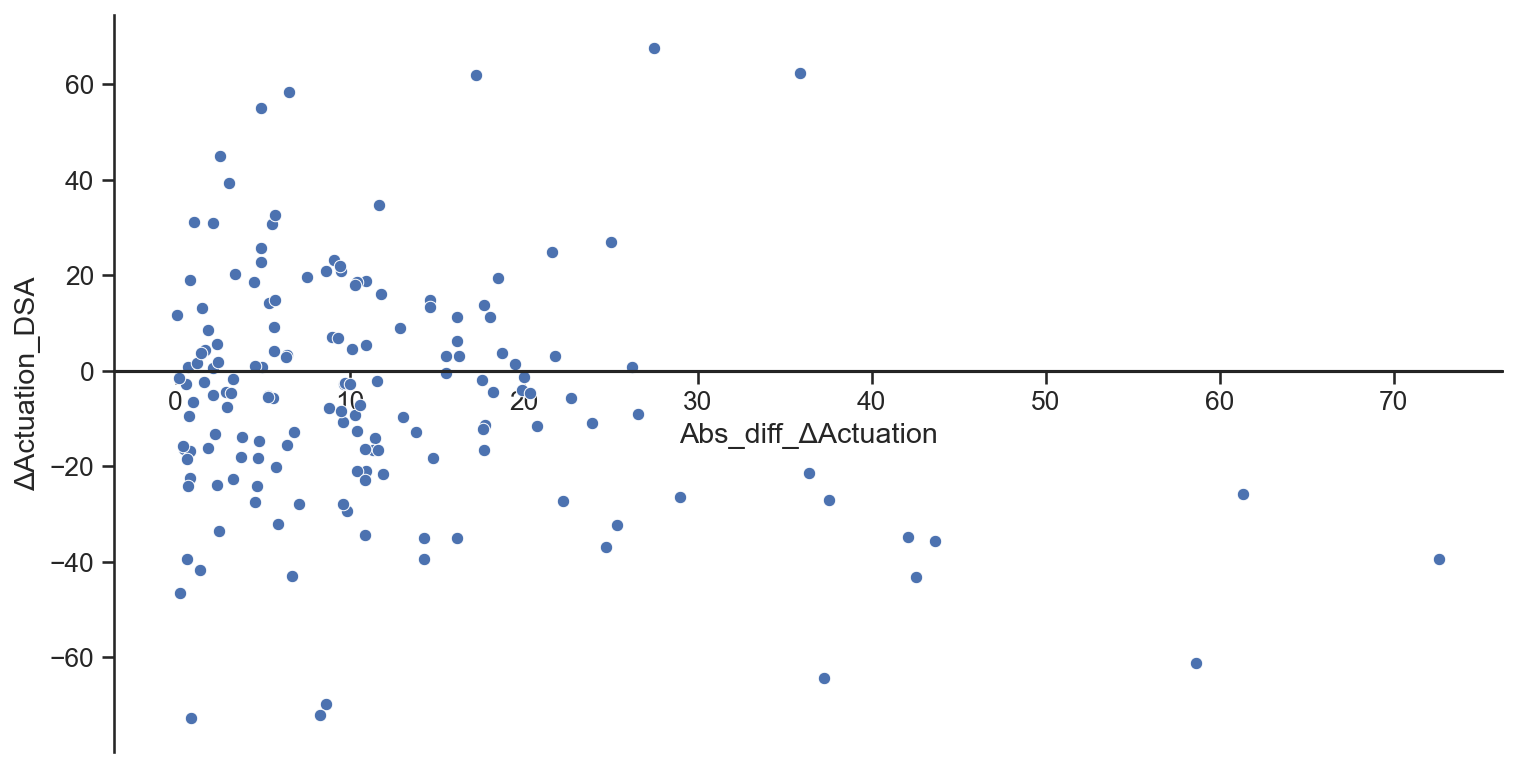

In [ ]:
sns.set_theme(font="Arial", font_scale=1.15, style='ticks') 
matplotlib.rcParams['figure.dpi'] = 150
plt.rc("axes.spines", top=False, right=False)

fig, ax = plt.subplots(1, 1, figsize=(10, 5), constrained_layout=True)
sns.scatterplot(data=merged_df_somSNVFIRE_to_hg38_filtered, x='Abs_diff_ΔActuation', y='ΔActuation_DSA', ax=ax)

ax.axhline(0, color='gray', linewidth=0.5)
ax.spines['bottom'].set_position(('data', 0))

ax.xaxis.set_label_position('bottom')
ax.xaxis.set_ticks_position('bottom')
ax.axhline(0, color="k", clip_on=False)

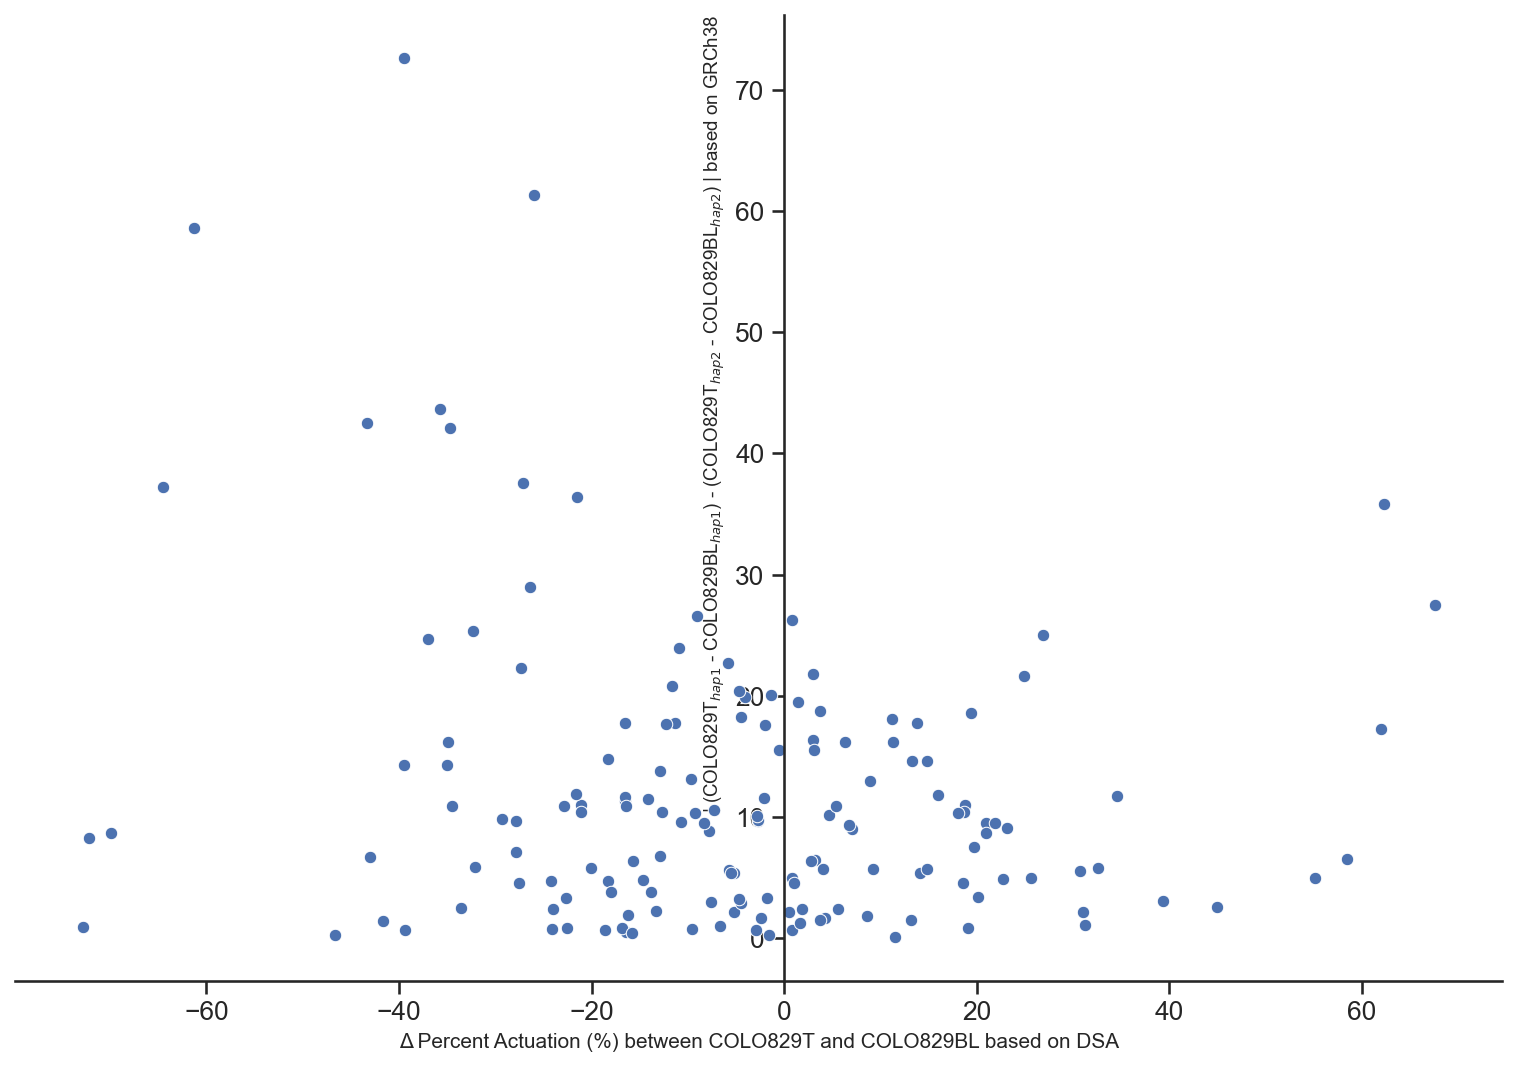

In [ ]:
sns.set_theme(font="Arial", font_scale=1.15, style='ticks') 
matplotlib.rcParams['figure.dpi'] = 150
plt.rc("axes.spines", top=False, right=False)

fig, ax = plt.subplots(1, 1, figsize=(10, 7), constrained_layout=True)
sns.scatterplot(data=merged_df_somSNVFIRE_to_hg38_filtered, x='ΔActuation_DSA', y='Abs_diff_ΔActuation', ax=ax)

#ax.axvline(0, color='gray', linewidth=0.5)
ax.spines['left'].set_position(('data', 0))
ax.yaxis.set_label_position('left')
ax.set_ylabel(r'| (COLO829T$_{hap1}$ - COLO829BL$_{hap1}$) - (COLO829T$_{hap2}$ - COLO829BL$_{hap2}$) | based on GRCh38', fontsize=9, loc='top')

ax.set_xlabel("Δ Percent Actuation (%) between COLO829T and COLO829BL based on DSA", fontsize=10)
ax.xaxis.set_label_position('bottom')
ax.xaxis.set_ticks_position('bottom')
#ax.axhline(0, color="k", clip_on=False)

In [ ]:
colotb_nonsomsnvFIRE_to_hg38 = pd.read_table(f"{liftdir}/CROSSTAB-FIRE_PS00338_COLO829BL_1_on_FIRE_merged_COLO829BL_and_TB.FlaggerHap_tohg38_sorted_nonsomSNV.tsv", sep='\t')
colobl_nonsomsnvFIRE_to_hg38 = pd.read_table(f"{liftdir}/CROSSTAB-FIRE_COLO_T_2_PS00_418_451_488_on_FIRE_merged_COLO829BL_and_TB.FlaggerHap_tohg38_sorted_nonsomSNV.tsv", sep='\t')

merged_df_nonsomSNVFIRE_to_hg38 = pd.merge(colobl_nonsomsnvFIRE_to_hg38[['ID', 'FIRE_hap1', 'COV_hap1', 'FIRE_hap2', 'COV_hap2', 'FIRE_UNK', 'COV_UNK']], colotb_nonsomsnvFIRE_to_hg38[['ID', 'FIRE_hap1', 'COV_hap1', 'FIRE_hap2', 'COV_hap2', 'FIRE_UNK', 'COV_UNK']], on='ID', suffixes=('_COLO829BL', '_COLO829'))

id_match_hg38 = dict(zip(colotb_nonsomsnvFIRE_to_hg38['ID'], colotb_nonsomsnvFIRE_to_hg38['FIREid']))
merged_df_nonsomSNVFIRE_to_hg38['FIREid'] = merged_df_nonsomSNVFIRE_to_hg38['ID'].map(id_match_hg38)

merged_df_nonsomSNVFIRE_to_hg38_filtered = merged_df_nonsomSNVFIRE_to_hg38[
    (merged_df_nonsomSNVFIRE_to_hg38['COV_hap1_COLO829BL'] >= 10) & 
    (merged_df_nonsomSNVFIRE_to_hg38['COV_hap2_COLO829BL'] >= 10) & 
    (merged_df_nonsomSNVFIRE_to_hg38['COV_hap1_COLO829'] >= 10) & 
    (merged_df_nonsomSNVFIRE_to_hg38['COV_hap2_COLO829'] >= 10)].reset_index(drop=True)

merged_df_nonsomSNVFIRE_to_hg38_filtered['Actuation_COLO829BL_hap1'] = merged_df_nonsomSNVFIRE_to_hg38_filtered['FIRE_hap1_COLO829BL']*100 / merged_df_nonsomSNVFIRE_to_hg38_filtered['COV_hap1_COLO829BL']
merged_df_nonsomSNVFIRE_to_hg38_filtered['Actuation_COLO829BL_hap2'] = merged_df_nonsomSNVFIRE_to_hg38_filtered['FIRE_hap2_COLO829BL']*100 / merged_df_nonsomSNVFIRE_to_hg38_filtered['COV_hap2_COLO829BL']
merged_df_nonsomSNVFIRE_to_hg38_filtered['Actuation_COLO829_hap1'] = merged_df_nonsomSNVFIRE_to_hg38_filtered['FIRE_hap1_COLO829']*100 / merged_df_nonsomSNVFIRE_to_hg38_filtered['COV_hap1_COLO829']
merged_df_nonsomSNVFIRE_to_hg38_filtered['Actuation_COLO829_hap2'] = merged_df_nonsomSNVFIRE_to_hg38_filtered['FIRE_hap2_COLO829']*100 / merged_df_nonsomSNVFIRE_to_hg38_filtered['COV_hap2_COLO829']

merged_df_nonsomSNVFIRE_to_hg38_filtered['ΔActuation_hap1'] = merged_df_nonsomSNVFIRE_to_hg38_filtered['Actuation_COLO829BL_hap1'] - merged_df_nonsomSNVFIRE_to_hg38_filtered['Actuation_COLO829_hap1']
merged_df_nonsomSNVFIRE_to_hg38_filtered['ΔActuation_hap2'] = merged_df_nonsomSNVFIRE_to_hg38_filtered['Actuation_COLO829BL_hap2'] - merged_df_nonsomSNVFIRE_to_hg38_filtered['Actuation_COLO829_hap2']

merged_df_nonsomSNVFIRE_to_hg38_filtered['Abs_diff_ΔActuation'] = abs(merged_df_nonsomSNVFIRE_to_hg38_filtered['ΔActuation_hap1'] - merged_df_nonsomSNVFIRE_to_hg38_filtered['ΔActuation_hap2'])

merged_df_testset_nonsnvoverlap = merged_df_testset[~merged_df_testset["SNV_overlap"]].sort_values(by='ΔActuation').reset_index(drop=True).copy()
fireid_nonsnv_deltaactuation_dsa_match = dict(zip(merged_df_testset_nonsnvoverlap['FIREid'], merged_df_testset_nonsnvoverlap['ΔActuation']))

merged_df_nonsomSNVFIRE_to_hg38_filtered['ΔActuation_DSA'] = merged_df_nonsomSNVFIRE_to_hg38_filtered['FIREid'].map(fireid_nonsnv_deltaactuation_dsa_match)

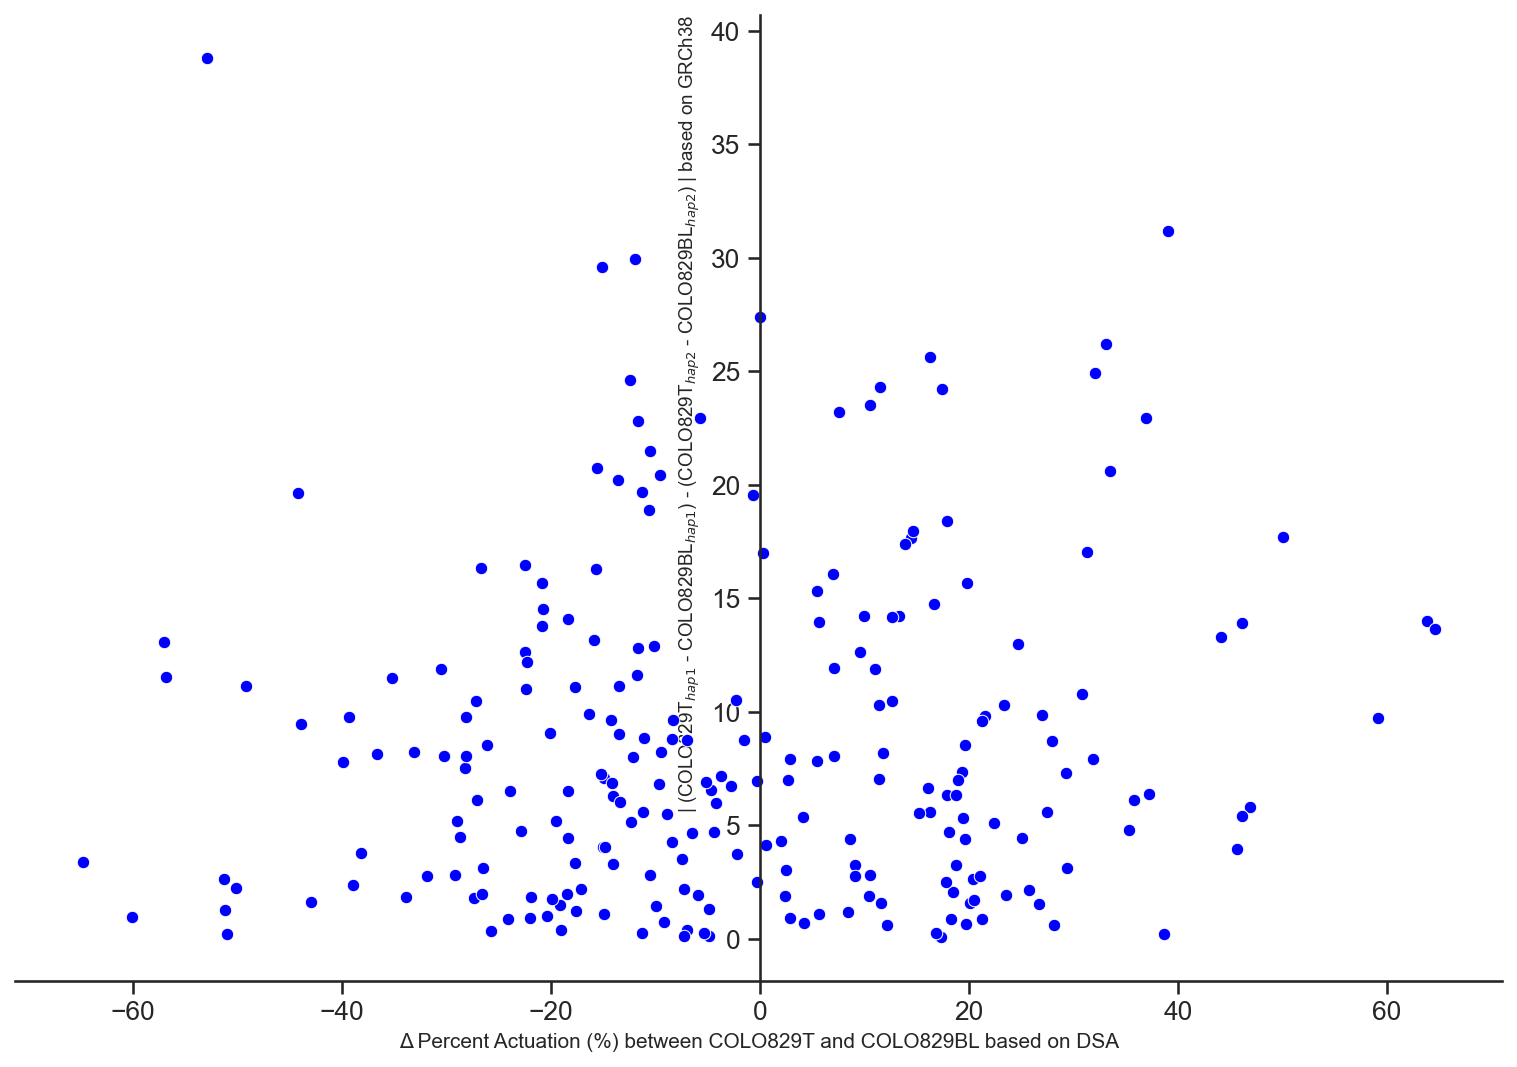

In [ ]:
merged_df_nonsomSNVFIRE_to_hg38_filtered_sampled_n236_seed42 = merged_df_nonsomSNVFIRE_to_hg38_filtered.sample(n=236, random_state=42, replace=False)
merged_df_nonsomSNVFIRE_to_hg38_filtered_sampled_n236_seed41 = merged_df_nonsomSNVFIRE_to_hg38_filtered.sample(n=236, random_state=41, replace=False)

sns.set_theme(font="Arial", font_scale=1.15, style='ticks') 
matplotlib.rcParams['figure.dpi'] = 150
plt.rc("axes.spines", top=False, right=False)

fig, ax = plt.subplots(1, 1, figsize=(10, 7), constrained_layout=True)
sns.scatterplot(data=merged_df_nonsomSNVFIRE_to_hg38_filtered_sampled_n236_seed42, x='ΔActuation_DSA', y='Abs_diff_ΔActuation', color='blue', ax=ax)

#ax.axvline(0, color='gray', linewidth=0.5)
ax.spines['left'].set_position(('data', 0))
ax.yaxis.set_label_position('left')
ax.set_ylabel(r'| (COLO829T$_{hap1}$ - COLO829BL$_{hap1}$) - (COLO829T$_{hap2}$ - COLO829BL$_{hap2}$) | based on GRCh38', fontsize=9, loc='top')

ax.set_xlabel("Δ Percent Actuation (%) between COLO829T and COLO829BL based on DSA", fontsize=10)
ax.xaxis.set_label_position('bottom')
ax.xaxis.set_ticks_position('bottom')
#ax.axhline(0, color="k", clip_on=False)

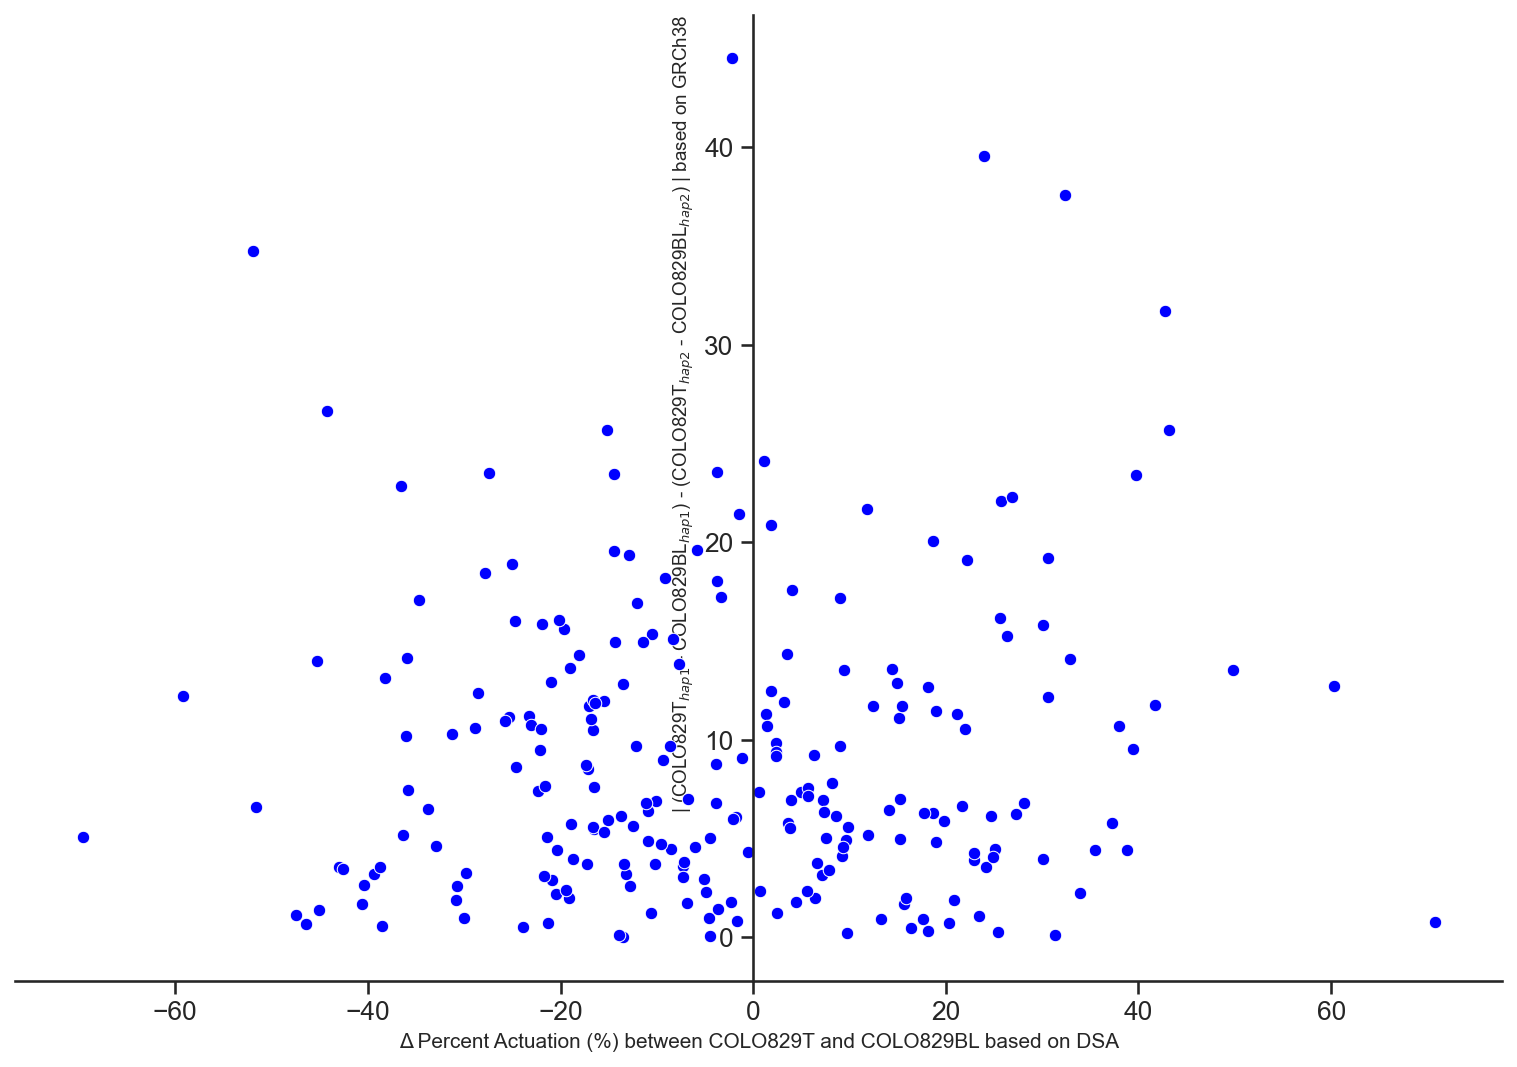

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7), constrained_layout=True)
sns.scatterplot(data=merged_df_nonsomSNVFIRE_to_hg38_filtered_sampled_n236_seed41, x='ΔActuation_DSA', y='Abs_diff_ΔActuation', color='blue', ax=ax)

#ax.axvline(0, color='gray', linewidth=0.5)
ax.spines['left'].set_position(('data', 0))
ax.yaxis.set_label_position('left')
ax.set_ylabel(r'| (COLO829T$_{hap1}$ - COLO829BL$_{hap1}$) - (COLO829T$_{hap2}$ - COLO829BL$_{hap2}$) | based on GRCh38', fontsize=9, loc='top')

ax.set_xlabel("Δ Percent Actuation (%) between COLO829T and COLO829BL based on DSA", fontsize=10)
ax.xaxis.set_label_position('bottom')
ax.xaxis.set_ticks_position('bottom')
#ax.axhline(0, color="k", clip_on=False)

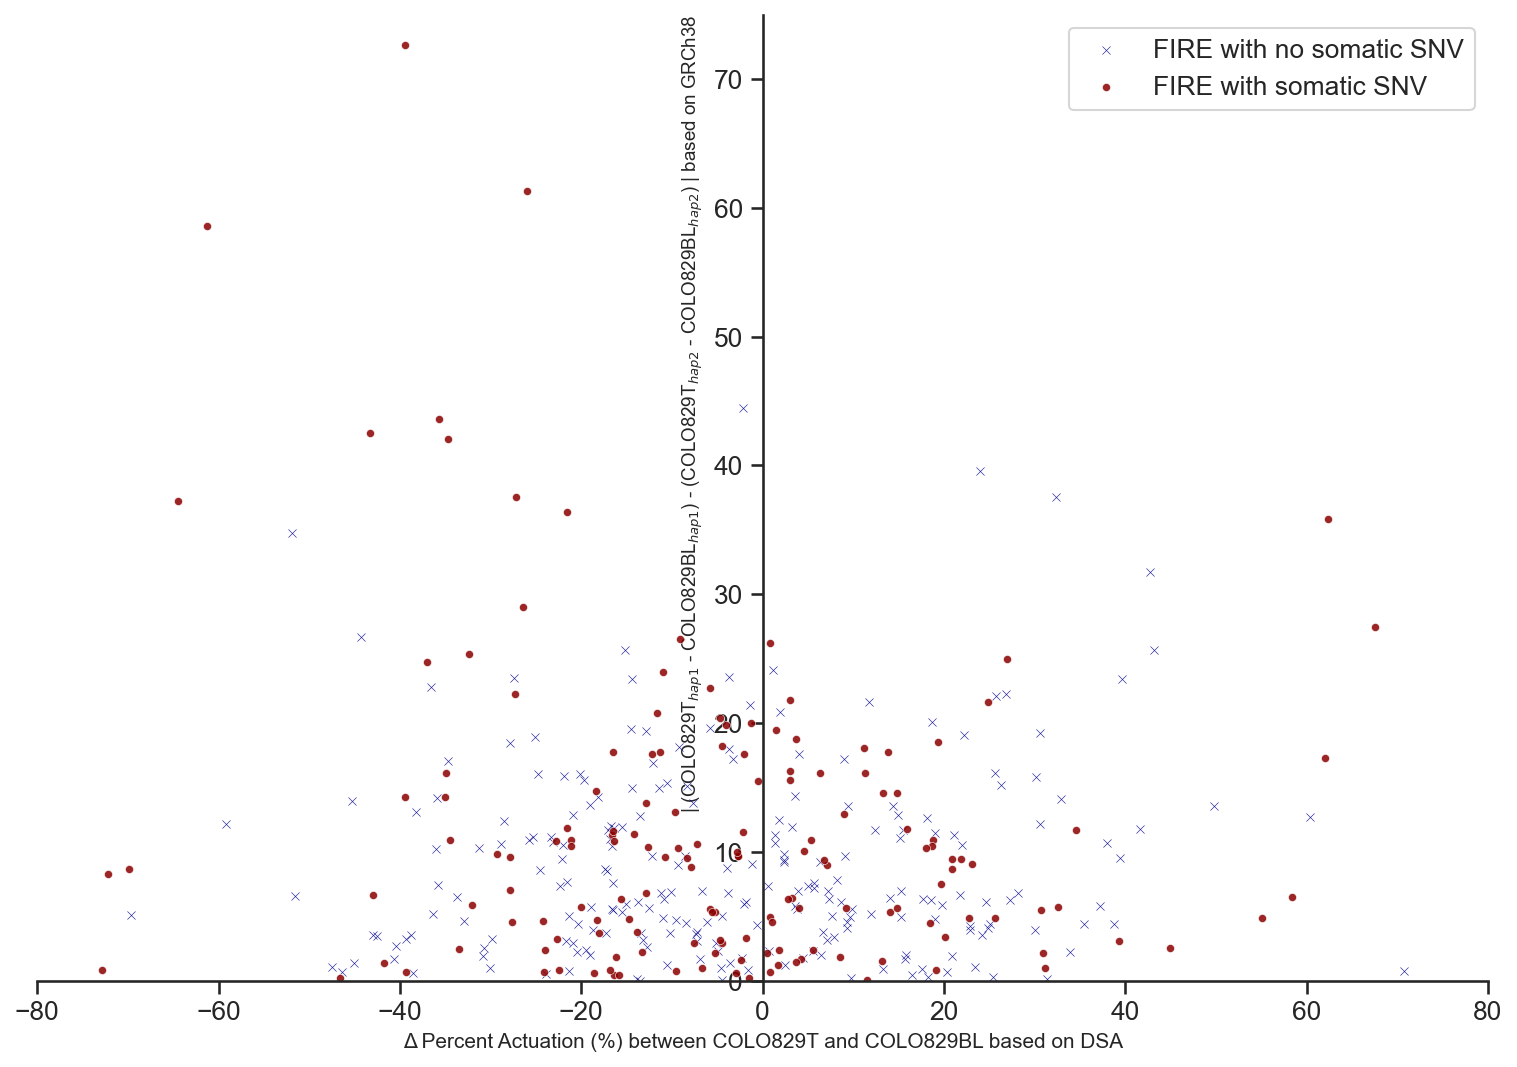

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7), constrained_layout=True)

sns.scatterplot(data=merged_df_nonsomSNVFIRE_to_hg38_filtered_sampled_n236_seed41, 
                x='ΔActuation_DSA', y='Abs_diff_ΔActuation', color='darkblue', marker='x', s=15, alpha=0.85, label='FIRE with no somatic SNV', ax=ax)
sns.scatterplot(data=merged_df_somSNVFIRE_to_hg38_filtered, 
                x='ΔActuation_DSA', y='Abs_diff_ΔActuation', color='darkred', marker='o', s=15, alpha=0.85, label='FIRE with somatic SNV', ax=ax)

#ax.axvline(0, color='gray', linewidth=0.5)
ax.set_ylim(0, 75)
ax.spines['left'].set_position(('data', 0))
ax.yaxis.set_label_position('left')
ax.set_ylabel(r'| (COLO829T$_{hap1}$ - COLO829BL$_{hap1}$) - (COLO829T$_{hap2}$ - COLO829BL$_{hap2}$) | based on GRCh38', fontsize=9, loc='top')

ax.set_xlim(-80, 80)
ax.set_xlabel("Δ Percent Actuation (%) between COLO829T and COLO829BL based on DSA", fontsize=10)
ax.xaxis.set_label_position('bottom')
ax.xaxis.set_ticks_position('bottom')
#ax.axhline(0, color="k", clip_on=False)

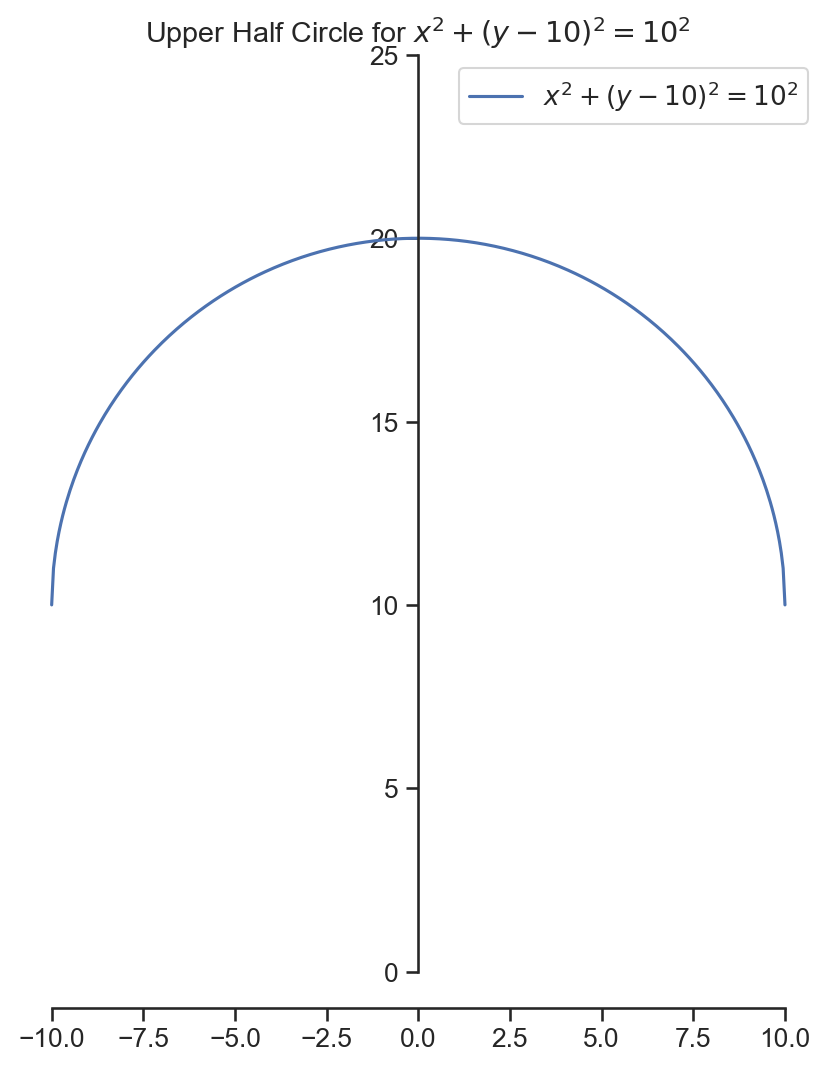

In [45]:
sns.set_theme(font="Arial", font_scale=1.15, style='ticks') 
matplotlib.rcParams['figure.dpi'] = 150
plt.rc("axes.spines", top=False, right=False)

r = 10
h = 0
k = 10

x = np.linspace(-r, r, 400)
y = np.sqrt(r**2 - x**2) + k

fig, ax = plt.subplots(1, 1, figsize=(10, 7), constrained_layout=True)

ax.plot(x, y, label=r'$x^2 + (y-10)^2 = 10^2$')

ax.set_ylim(-1,25)
ax.set_aspect('equal')
ax.set_title('Upper Half Circle for $x^2 + (y-10)^2 = 10^2$')
sns.despine(trim=True)

ax.spines['left'].set_position(('data', 0))

ax.legend()


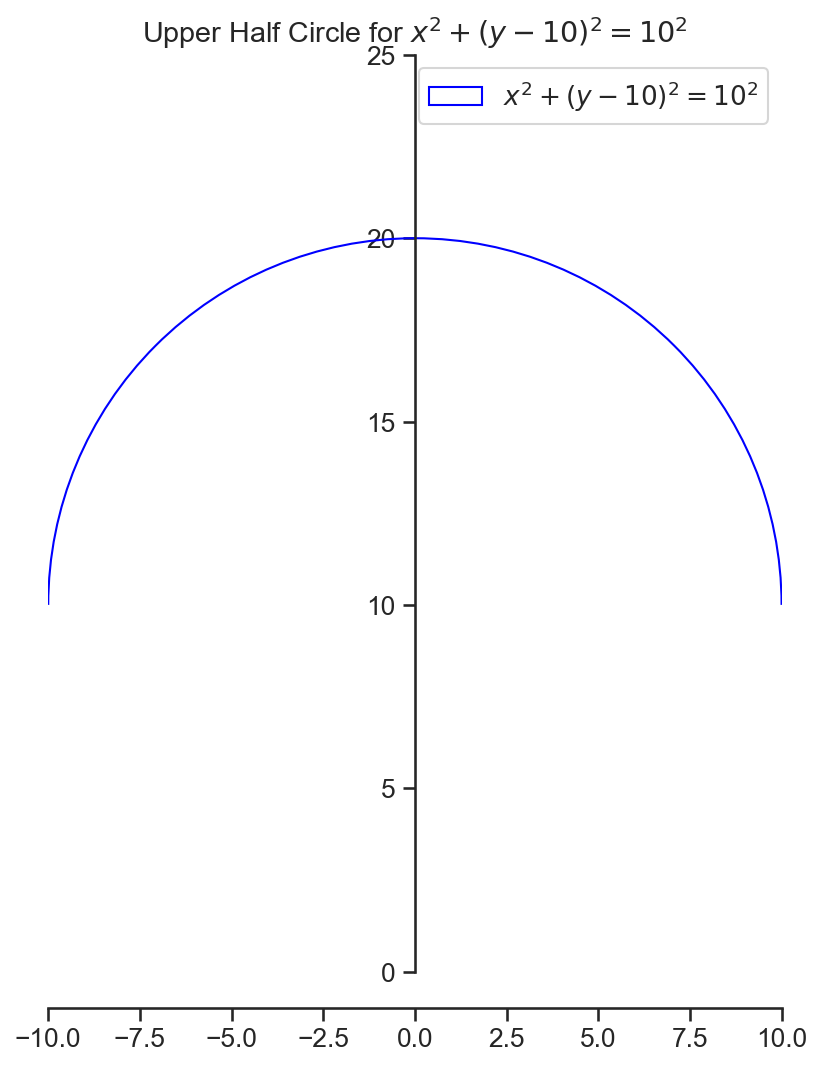

In [44]:
from matplotlib.patches import Arc

r = 10
h = 0
k = 10

fig, ax = plt.subplots(1, 1, figsize=(10, 7), constrained_layout=True)

arc = Arc((h, k), 2*r, 2*r, angle=0, theta1=0, theta2=180, edgecolor='blue', label=r'$x^2 + (y-10)^2 = 10^2$')

ax.add_patch(arc)
ax.set_xlim(-r, r)
ax.set_ylim(-1,25)
ax.set_aspect('equal')

ax.set_title('Upper Half Circle for $x^2 + (y-10)^2 = 10^2$')

sns.despine(trim=True)
ax.spines['left'].set_position(('data', 0))
ax.legend()

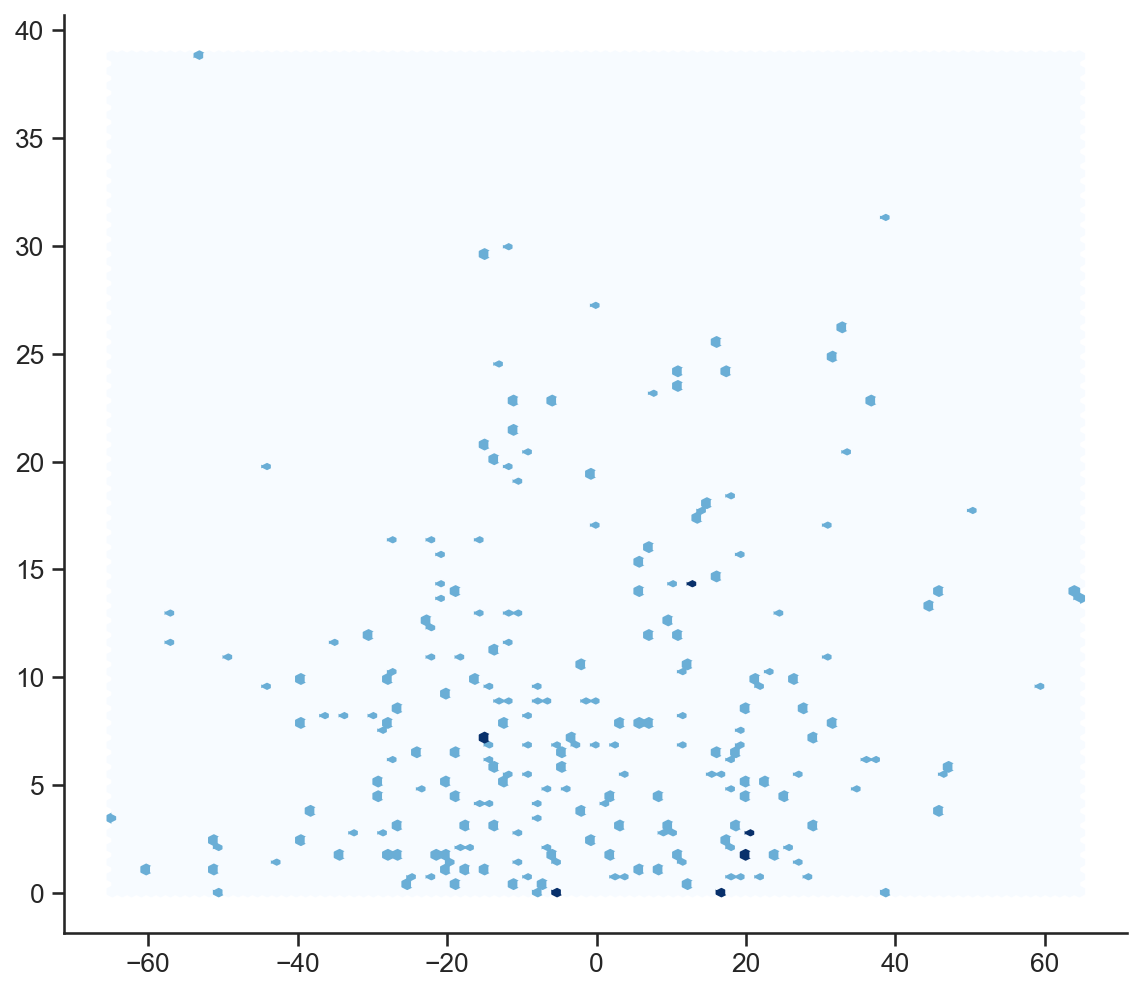

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(7.5,6.5), constrained_layout=True)
hb = ax.hexbin(merged_df_nonsomSNVFIRE_to_hg38_filtered_sampled_n236_seed42['ΔActuation_DSA'], merged_df_nonsomSNVFIRE_to_hg38_filtered_sampled_n236_seed42['Abs_diff_ΔActuation'], cmap='Blues')

#ax.spines['left'].set_position(('data', 0))
#ax.yaxis.set_label_position('left')
#ax.set_ylabel(r'| (COLO829T$_{hap1}$ - COLO829BL$_{hap1}$) - (COLO829T$_{hap2}$ - COLO829BL$_{hap2}$) | based on GRCh38', fontsize=9, loc='top')
#sns.despine(trim=True)


In [ ]:
colotb_nonsomsnvFIRE_to_hg38

,ID,FIREid,FIRE_hap1,COV_hap1,FIRE_hap2,COV_hap2,FIRE_UNK,COV_UNK
0,chr1:586089-586251,peak_179261,0,0,7,14,0,0
1,chr1:605446-605537,peak_179262,11,47,2,65,0,0
2,chr1:629083-629198,peak_179263,1,67,1,78,0,0
3,chr1:632970-633146,peak_179264,2,69,1,75,0,0
4,chr1:633824-634020,peak_179265,0,71,1,77,0,0
...,...,...,...,...,...,...,...,...
239378,chrY:26257387-26257569,peak_247364,6,35,0,0,2,19
239379,chrY:26260547-26260813,peak_247365,10,45,0,0,6,21
239380,chrY:26273218-26273363,peak_247366,18,65,0,0,1,9
239381,chrY:26315190-26315362,peak_247367,17,84,0,0,0,0


In [ ]:
#sns.set_theme(font="Arial", font_scale=1.15, style='ticks')
#matplotlib.rcParams['figure.dpi'] = 150
#plt.rc("axes.spines", top=True, right=True)
#
#fig, ax = plt.subplots(1, 1, figsize=(6, 12), constrained_layout=True)
#sns.heatmap(data=merged_df_somSNVFIRE_to_hg38.iloc[:, [1,2,7,8,3,4,9,10]], 
#            yticklabels=False,
#            cmap='viridis',
#            ax=ax)

In [ ]:
#clustermap = sns.clustermap(data=merged_df_somSNVFIRE_to_hg38.iloc[:, [1,2,7,8,3,4,9,10,5,6,11,12]],
#                            cmap='viridis',
#                            row_cluster=True,
#                            col_cluster=False,
#                            yticklabels=False,
#                            figsize=(6, 12))
#
#clustermap.cax.set_visible(False)

# TEST TEST TEST

In [ ]:
dbs_snvid = list(map(lambda x: x.strip(), open("/mmfs1/gscratch/stergachislab/mhsohny/SMaHT/Improving_SomaticVariantCalling_through_DSA/Fiber-seq/VariantCalls_DeepVariant_1.6.1/liftOver_tohg38/bcftools_liftOver/DBS_snvid_colotb_tba.txt", 'r').readlines()))

In [ ]:
import gzip as gz
import io
def read_vcf(path):
    if path[-3:] == ".gz": 
        with gz.open(path, 'rb') as f:
            lines = [l.decode('utf-8') for l in f if not l.startswith(b'##')]
            return pd.read_csv(
                io.StringIO(''.join(lines)),
                dtype={'#CHROM': str, 'POS': int, 'ID': str, 'REF': str, 'ALT': str,
                       'QUAL': str, 'FILTER': str, 'INFO': str},
                       sep='\t'
                       ).rename(columns={'#CHROM': 'CHROM'})
    else:
        with open(path, 'r') as f:
            lines = [l for l in f if not l.startswith('##')]
            return pd.read_csv(
                io.StringIO(''.join(lines)),
                dtype={'#CHROM': str, 'POS': int, 'ID': str, 'REF': str, 'ALT': str,
                       'QUAL': str, 'FILTER': str, 'INFO': str},
                       sep='\t'
                       ).rename(columns={'#CHROM': 'CHROM'})


rejectvcf = read_vcf(f"/mmfs1/gscratch/stergachislab/mhsohny/SMaHT/Improving_SomaticVariantCalling_through_DSA/Fiber-seq/VariantCalls_DeepVariant_1.6.1/liftOver_tohg38/bcftools_liftOver/test/REJECT_COLO829T_PassageB_DSA.deepvariant.split.snv.modified.final.tba.tohg38.multi.vcf.gz")
rejectvcf['SNVid'] = rejectvcf[['CHROM', 'POS', 'REF', 'ALT']].astype(str).apply('_'.join, axis=1)
rejectvcf

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,COLO829T_PassageB_DSA,SNVid
0,haplotype1-0000001,436345,.,G,A,58.7,UnmappedAnchors,.,GT:GQ:DP:AD:VAF:PL,"1/1:53:49:0,49:1:58,54,0",haplotype1-0000001_436345_G_A
1,haplotype1-0000001,27806125,.,C,A,71.5,UnmappedAnchors,.,GT:GQ:DP:AD:VAF:PL,"1/1:67:102:0,102:1:71,69,0",haplotype1-0000001_27806125_C_A
2,haplotype1-0000001,80486626,.,C,T,62.8,UnmappedAnchors,.,GT:GQ:DP:AD:VAF:PL,"1/1:56:69:0,69:1:62,57,0",haplotype1-0000001_80486626_C_T
3,haplotype1-0000001,80495003,.,C,T,66,UnmappedAnchors,.,GT:GQ:DP:AD:VAF:PL,"1/1:58:94:0,92:0.978723:65,58,0",haplotype1-0000001_80495003_C_T
4,haplotype1-0000001,80509214,.,G,T,69.7,UnmappedAnchors,.,GT:GQ:DP:AD:VAF:PL,"1/1:62:89:0,89:1:69,63,0",haplotype1-0000001_80509214_G_T
...,...,...,...,...,...,...,...,...,...,...,...
8629,haplotype2-0000137,541954,.,G,A,35.2,UnmappedAnchors,.,GT:GQ:DP:AD:VAF:PL,"0/1:11:97:29,68:0.701031:34,0,11",haplotype2-0000137_541954_G_A
8630,haplotype2-0000137,606494,.,G,A,31.3,UnmappedAnchors,.,GT:GQ:DP:AD:VAF:PL,"0/1:13:250:162,88:0.352:31,0,12",haplotype2-0000137_606494_G_A
8631,haplotype2-0000194,22585,.,G,A,44,UnmappedAnchors,.,GT:GQ:DP:AD:VAF:PL,"0/1:40:61:14,46:0.754098:43,0,42",haplotype2-0000194_22585_G_A
8632,haplotype2-0000194,36807,.,C,T,45.9,UnmappedAnchors,.,GT:GQ:DP:AD:VAF:PL,"0/1:23:60:11,49:0.816667:45,0,23",haplotype2-0000194_36807_C_T


In [ ]:
print(len(dbs_snvid))
print(len(set(dbs_snvid)))

2026
2013


In [ ]:
reject_dbs = rejectvcf[rejectvcf["SNVid"].isin(dbs_snvid)].reset_index(drop=True)
reject_dbs

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,COLO829T_PassageB_DSA,SNVid
0,haplotype1-0000001,87043916,.,G,A,60.8,UnmappedAnchors,.,GT:GQ:DP:AD:VAF:PL,"1/1:54:85:0,85:1:60,54,0",haplotype1-0000001_87043916_G_A
1,haplotype1-0000001,87043917,.,G,A,63.6,UnmappedAnchors,.,GT:GQ:DP:AD:VAF:PL,"1/1:59:85:0,85:1:63,60,0",haplotype1-0000001_87043917_G_A
2,haplotype1-0000001,87625456,.,G,A,63.2,UnmappedAnchors,.,GT:GQ:DP:AD:VAF:PL,"1/1:47:100:0,100:1:63,47,0",haplotype1-0000001_87625456_G_A
3,haplotype1-0000001,87625457,.,G,A,62.3,UnmappedAnchors,.,GT:GQ:DP:AD:VAF:PL,"1/1:58:100:0,100:1:62,60,0",haplotype1-0000001_87625457_G_A
4,haplotype1-0000001,89520094,.,G,A,62.9,UnmappedAnchors,.,GT:GQ:DP:AD:VAF:PL,"1/1:49:91:0,91:1:62,49,0",haplotype1-0000001_89520094_G_A
...,...,...,...,...,...,...,...,...,...,...,...
328,haplotype2-0000076,36344014,.,G,A,61.3,UnmappedAnchors,.,GT:GQ:DP:AD:VAF:PL,"1/1:56:73:0,73:1:61,57,0",haplotype2-0000076_36344014_G_A
329,haplotype2-0000079,60985829,.,C,T,66.8,UnmappedAnchors,.,GT:GQ:DP:AD:VAF:PL,"1/1:58:109:0,108:0.990826:66,58,0",haplotype2-0000079_60985829_C_T
330,haplotype2-0000079,60985830,.,T,G,67,UnmappedAnchors,.,GT:GQ:DP:AD:VAF:PL,"1/1:59:109:1,108:0.990826:66,59,0",haplotype2-0000079_60985830_T_G
331,haplotype2-0000136,14419,.,G,C,36.6,UnmappedAnchors,.,GT:GQ:DP:AD:VAF:PL,"0/1:30:106:47,59:0.556604:36,0,31",haplotype2-0000136_14419_G_C


In [ ]:
reject_dbs_adjacent = pd.concat([
    reject_dbs[reject_dbs.groupby("CHROM")['POS'].diff().shift(-1) == 1],
    reject_dbs[reject_dbs.groupby("CHROM")['POS'].diff() == 1],
    ]).reset_index(drop=True)
reject_dbs_adjacent

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,COLO829T_PassageB_DSA,SNVid
0,haplotype1-0000001,87043916,.,G,A,60.8,UnmappedAnchors,.,GT:GQ:DP:AD:VAF:PL,"1/1:54:85:0,85:1:60,54,0",haplotype1-0000001_87043916_G_A
1,haplotype1-0000001,87625456,.,G,A,63.2,UnmappedAnchors,.,GT:GQ:DP:AD:VAF:PL,"1/1:47:100:0,100:1:63,47,0",haplotype1-0000001_87625456_G_A
2,haplotype1-0000001,89520094,.,G,A,62.9,UnmappedAnchors,.,GT:GQ:DP:AD:VAF:PL,"1/1:49:91:0,91:1:62,49,0",haplotype1-0000001_89520094_G_A
3,haplotype1-0000001,89931082,.,G,A,63.1,UnmappedAnchors,.,GT:GQ:DP:AD:VAF:PL,"1/1:56:86:0,86:1:63,56,0",haplotype1-0000001_89931082_G_A
4,haplotype1-0000003,59631392,.,C,T,66.5,UnmappedAnchors,.,GT:GQ:DP:AD:VAF:PL,"1/1:56:118:0,118:1:66,56,0",haplotype1-0000003_59631392_C_T
...,...,...,...,...,...,...,...,...,...,...,...
331,haplotype2-0000076,1742258,.,G,A,60.8,UnmappedAnchors,.,GT:GQ:DP:AD:VAF:PL,"1/1:56:53:0,53:1:60,57,0",haplotype2-0000076_1742258_G_A
332,haplotype2-0000076,32320883,.,T,C,68.4,UnmappedAnchors,.,GT:GQ:DP:AD:VAF:PL,"1/1:62:126:0,126:1:68,63,0",haplotype2-0000076_32320883_T_C
333,haplotype2-0000076,36344014,.,G,A,61.3,UnmappedAnchors,.,GT:GQ:DP:AD:VAF:PL,"1/1:56:73:0,73:1:61,57,0",haplotype2-0000076_36344014_G_A
334,haplotype2-0000079,60985830,.,T,G,67,UnmappedAnchors,.,GT:GQ:DP:AD:VAF:PL,"1/1:59:109:1,108:0.990826:66,59,0",haplotype2-0000079_60985830_T_G


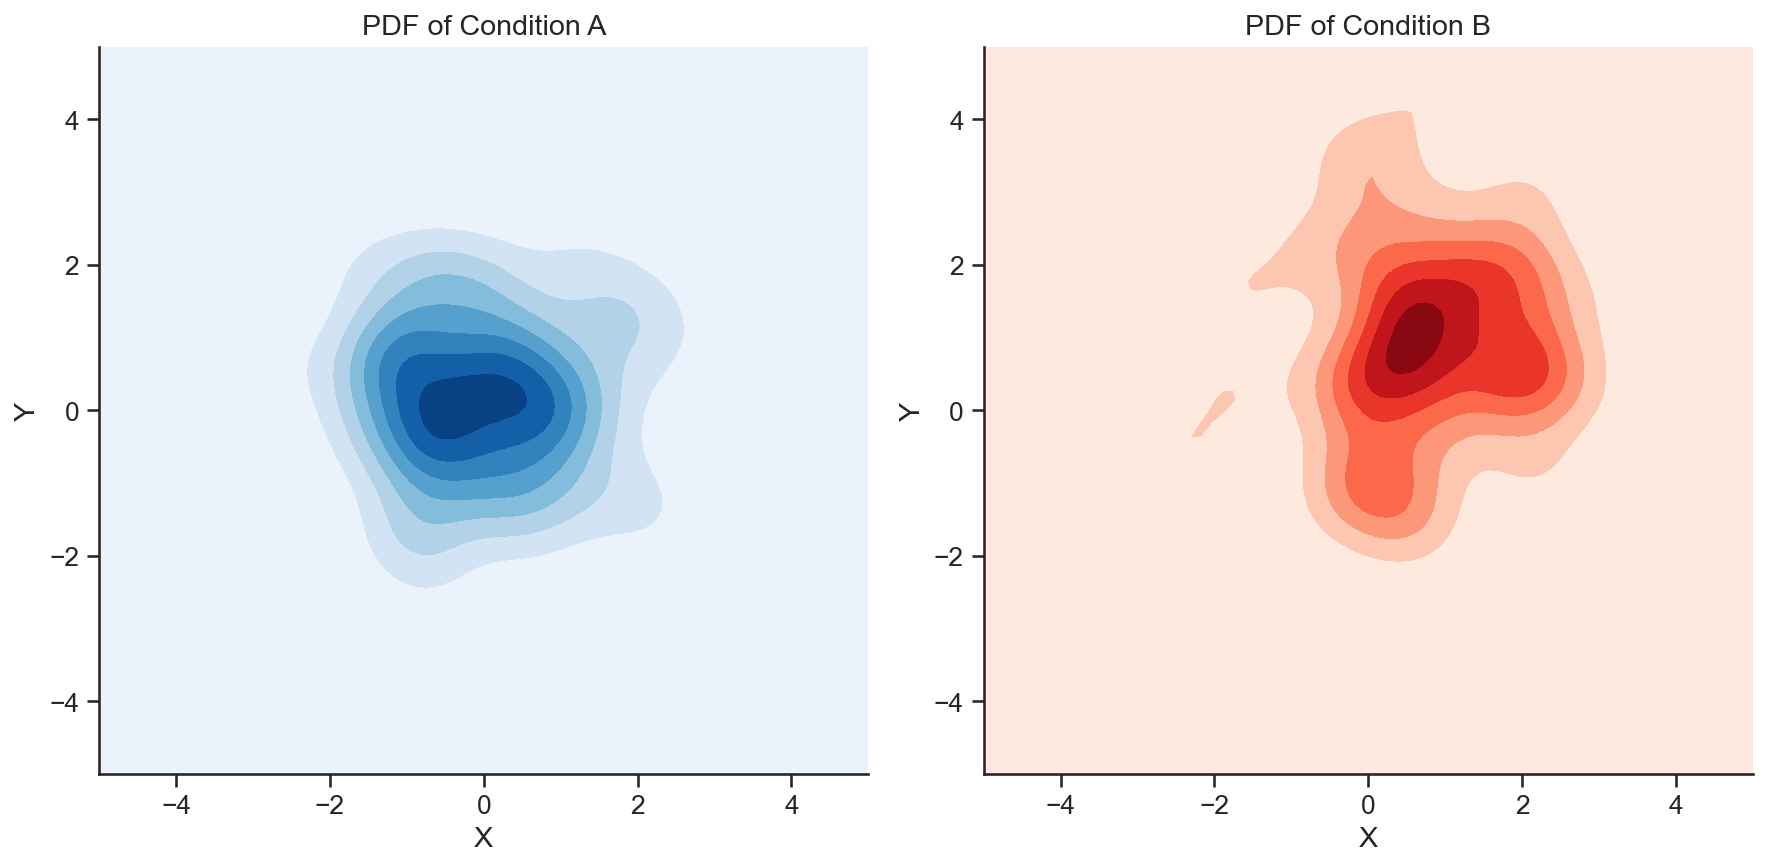

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Generate sample data for condition A and condition B
np.random.seed(0)
condition_A = np.random.normal(loc=0, scale=1, size=(100, 2))
condition_B = np.random.normal(loc=1, scale=1.5, size=(100, 2))

# Randomly select k features from condition B
k = 50
indices = np.random.choice(condition_B.shape[0], k, replace=False)
condition_B_sample = condition_B[indices]

# Estimate PDFs using Kernel Density Estimation
kde_A = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(condition_A)
kde_B = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(condition_B_sample)

# Evaluate the log density model on a grid of points
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
grid_points = np.vstack([X.ravel(), Y.ravel()]).T

log_dens_A = kde_A.score_samples(grid_points)
log_dens_B = kde_B.score_samples(grid_points)

# Reshape the log densities for plotting
Z_A = np.exp(log_dens_A).reshape(X.shape)
Z_B = np.exp(log_dens_B).reshape(X.shape)

# Plot the estimated PDFs
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.contourf(X, Y, Z_A, cmap='Blues')
plt.title('PDF of Condition A')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 2, 2)
plt.contourf(X, Y, Z_B, cmap='Reds')
plt.title('PDF of Condition B')
plt.xlabel('X') 
plt.ylabel('Y')

plt.tight_layout()
plt.show()